<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/VietnameseHandwritingCharacterClassification_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare data

In [1]:
# Mount Drive từ google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import một số thư viện cần thiết
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import pandas as pd


## Read data

In [9]:
# Lấy đường dẫn và nhãn
path_X_train = '/content/drive/MyDrive/Dataset/TrimImage/X_train_16x16_hog.csv'
path_Y_train = '/content/drive/MyDrive/Dataset/TrimImage/Y_train_16x16_hog.csv'
path_X_vali = '/content/drive/MyDrive/Dataset/TrimImage/X_val_16x16_hog.csv'
path_Y_vali = '/content/drive/MyDrive/Dataset/TrimImage/Y_val_16x16_hog.csv'
path_X_test = '/content/drive/MyDrive/Dataset/TrimImage/X_test_16x16_hog.csv'
path_Y_test = '/content/drive/MyDrive/Dataset/TrimImage/Y_test_16x16_hog.csv'


labels = os.listdir('/content/drive/MyDrive/Dataset/Dataset')
labels = sorted(labels)
print(labels)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [10]:
# Đọc và chuyển dữ liệu sang ndarray
X_train = pd.read_csv(path_X_train,header=None).to_numpy()
Y_train = pd.read_csv(path_Y_train,header=None).to_numpy()
X_vali = pd.read_csv(path_X_vali,header=None).to_numpy()
Y_vali = pd.read_csv(path_Y_vali,header=None).to_numpy()
X_test = pd.read_csv(path_X_test,header=None).to_numpy()
Y_test = pd.read_csv(path_Y_test,header=None).to_numpy()

In [11]:
# Kích thước dữ liệu
print(len(X_train),len(Y_train))
print(len(X_vali),len(Y_vali))
print(len(X_test),len(Y_test))
print(X_train)

11865 11865
2984 2984
2758 2758
[[0.06549652 0.         0.57100558 ... 0.         0.51834144 0.51834144]
 [0.01475419 0.04513494 0.53626096 ... 0.         0.06843306 0.        ]
 [0.01866423 0.0029898  0.5531211  ... 0.0949101  0.01418299 0.01246231]
 ...
 [0.38583828 0.32676128 0.38583828 ... 0.44584784 0.07809305 0.44584784]
 [0.27309383 0.43428378 0.18775201 ... 0.         0.11042794 0.49156561]
 [0.30881107 0.44707305 0.27630464 ... 0.39374279 0.10455343 0.27631211]]


**Dùng các model để huấn luyện và dự đoán**

In [26]:
# Chỉnh size các khung hiển thị ra màn hình
from matplotlib import rcParams
rcParams['figure.figsize'] = 40,40

# Sử dụng model Bernouli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.1581769436997319


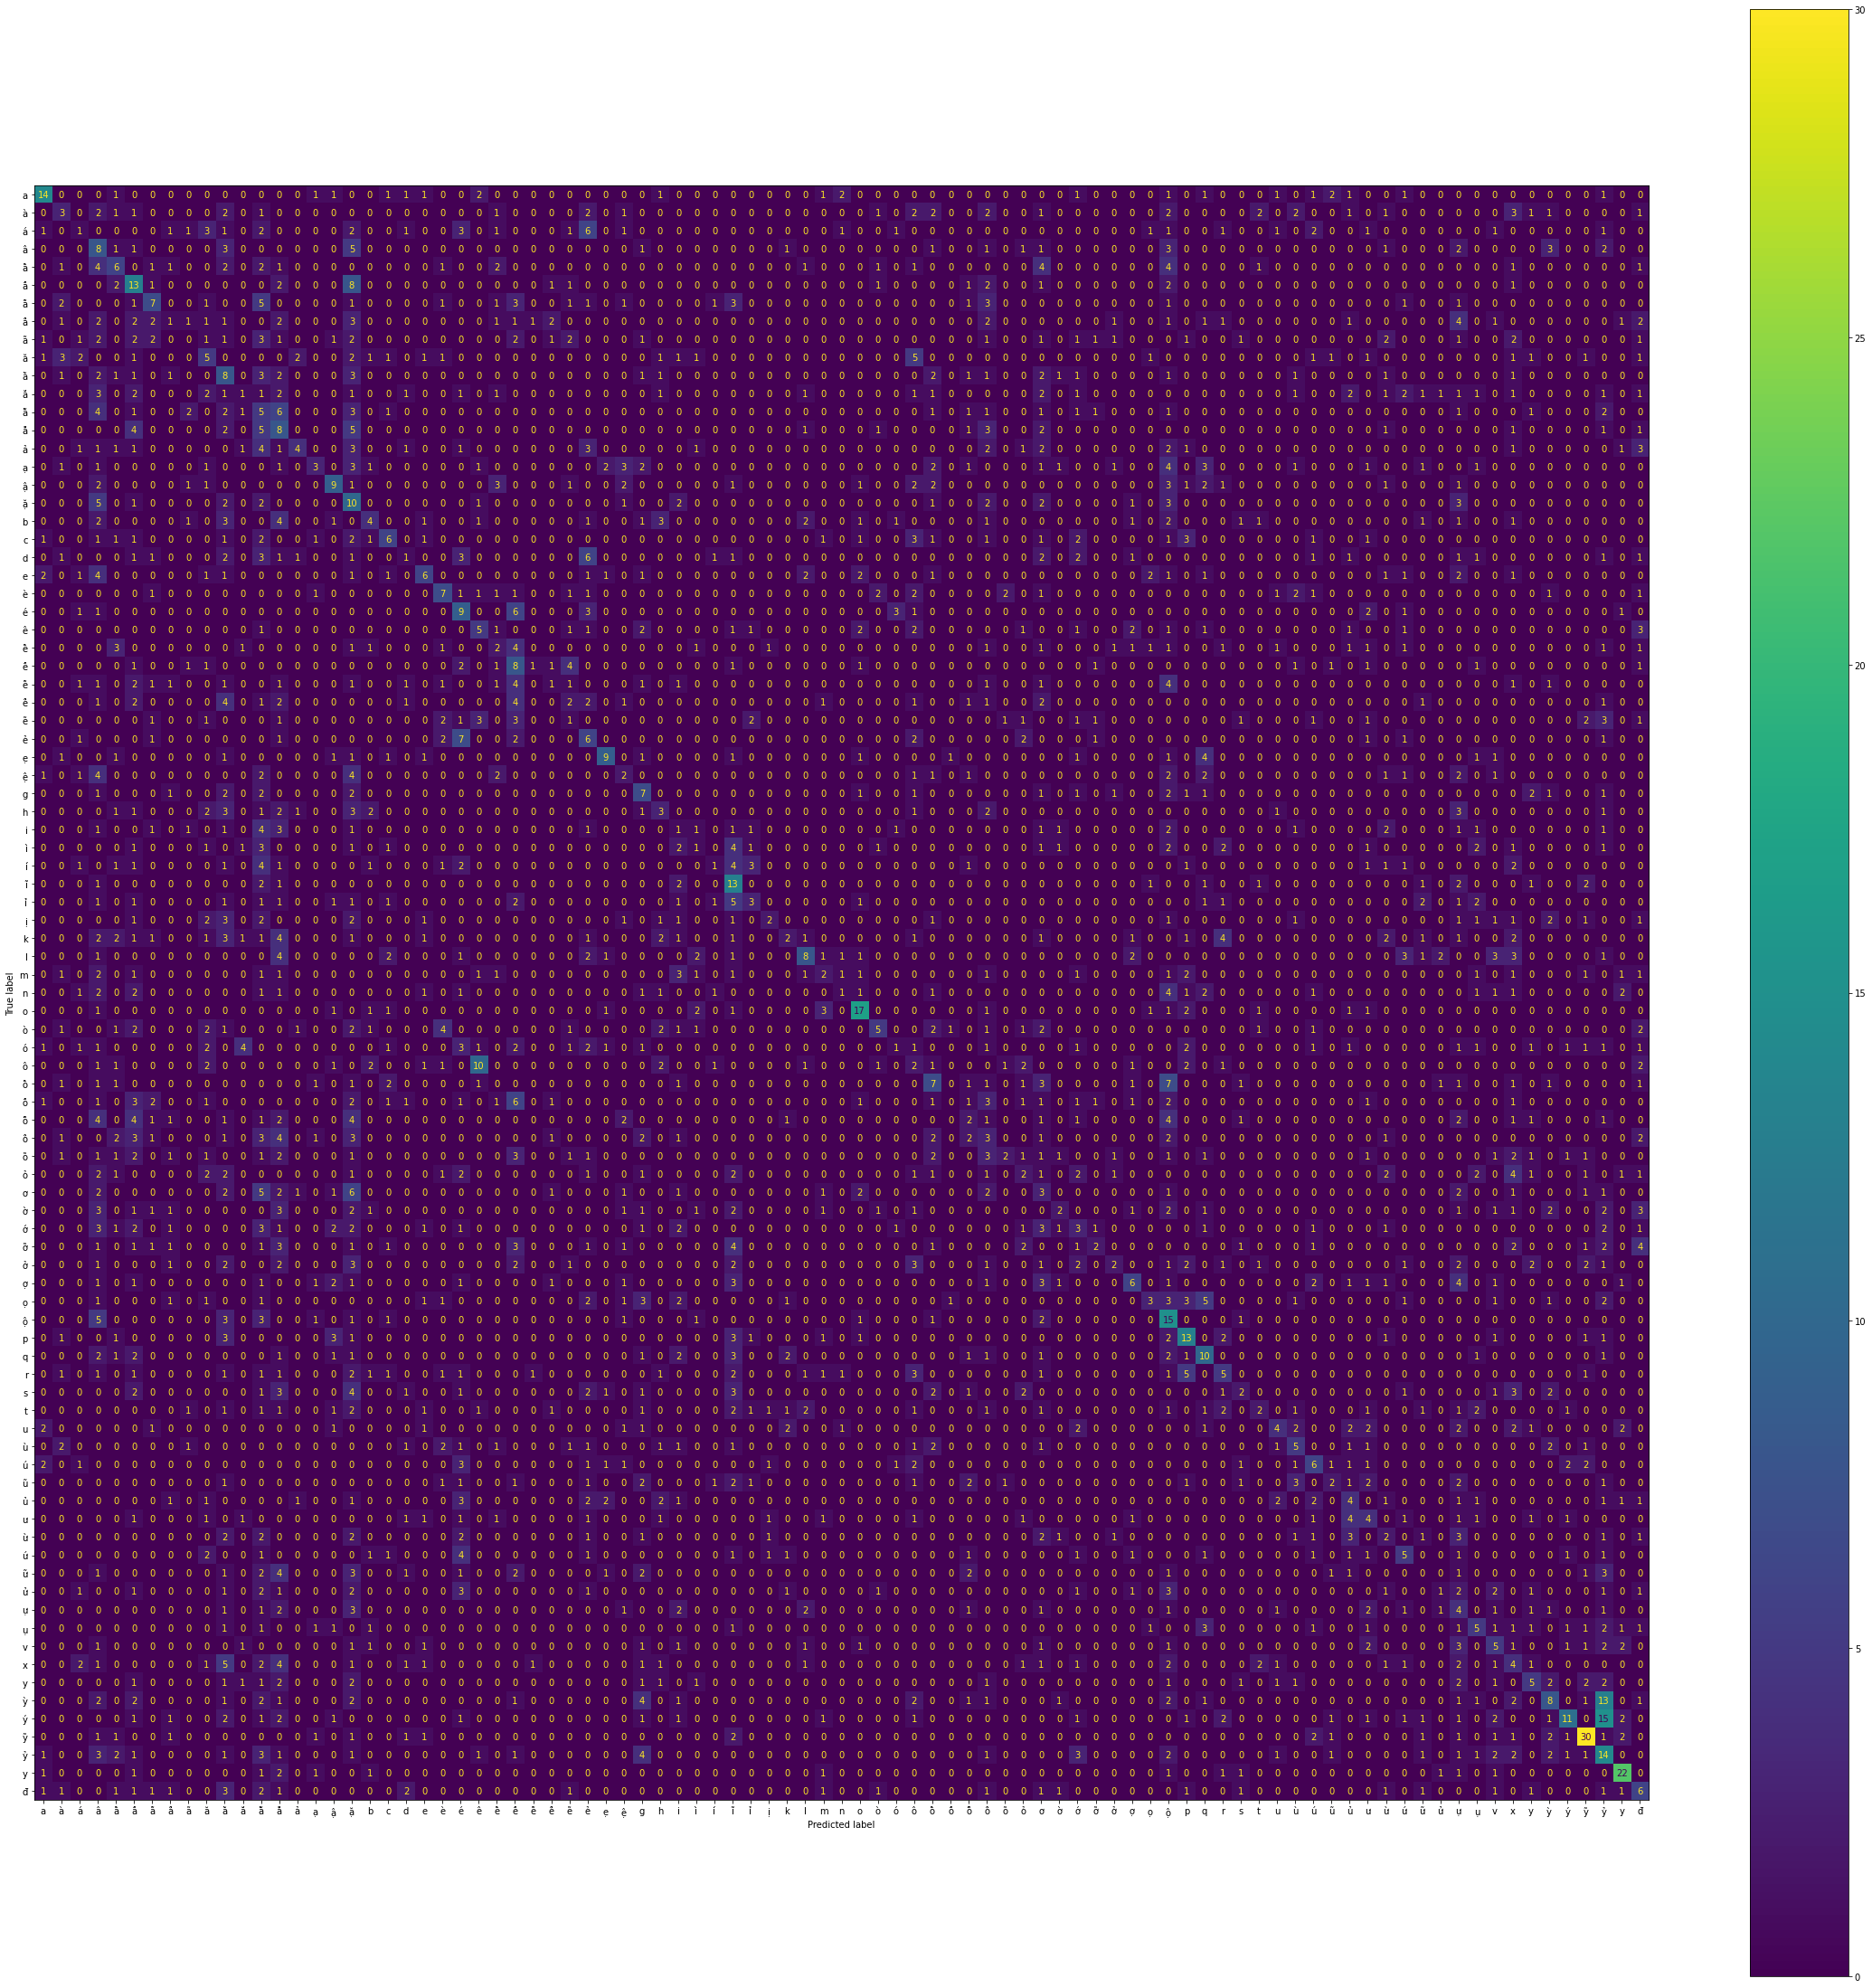

              precision    recall  f1-score   support

           a       0.47      0.39      0.42        36
          à       0.12      0.08      0.10        36
          á       0.06      0.03      0.04        36
          â       0.08      0.23      0.12        35
         ầ       0.17      0.17      0.17        35
         ấ       0.16      0.36      0.22        36
         ẫ       0.25      0.19      0.22        36
         ẩ       0.06      0.03      0.04        36
          ã       0.00      0.00      0.00        36
          ă       0.12      0.14      0.13        36
         ằ       0.09      0.22      0.13        36
         ắ       0.08      0.03      0.04        36
         ẵ       0.05      0.14      0.07        36
         ẳ       0.08      0.22      0.12        36
          ả       0.36      0.11      0.17        36
          ạ       0.23      0.08      0.12        36
         ậ       0.31      0.26      0.28        35
         ặ       0.08    

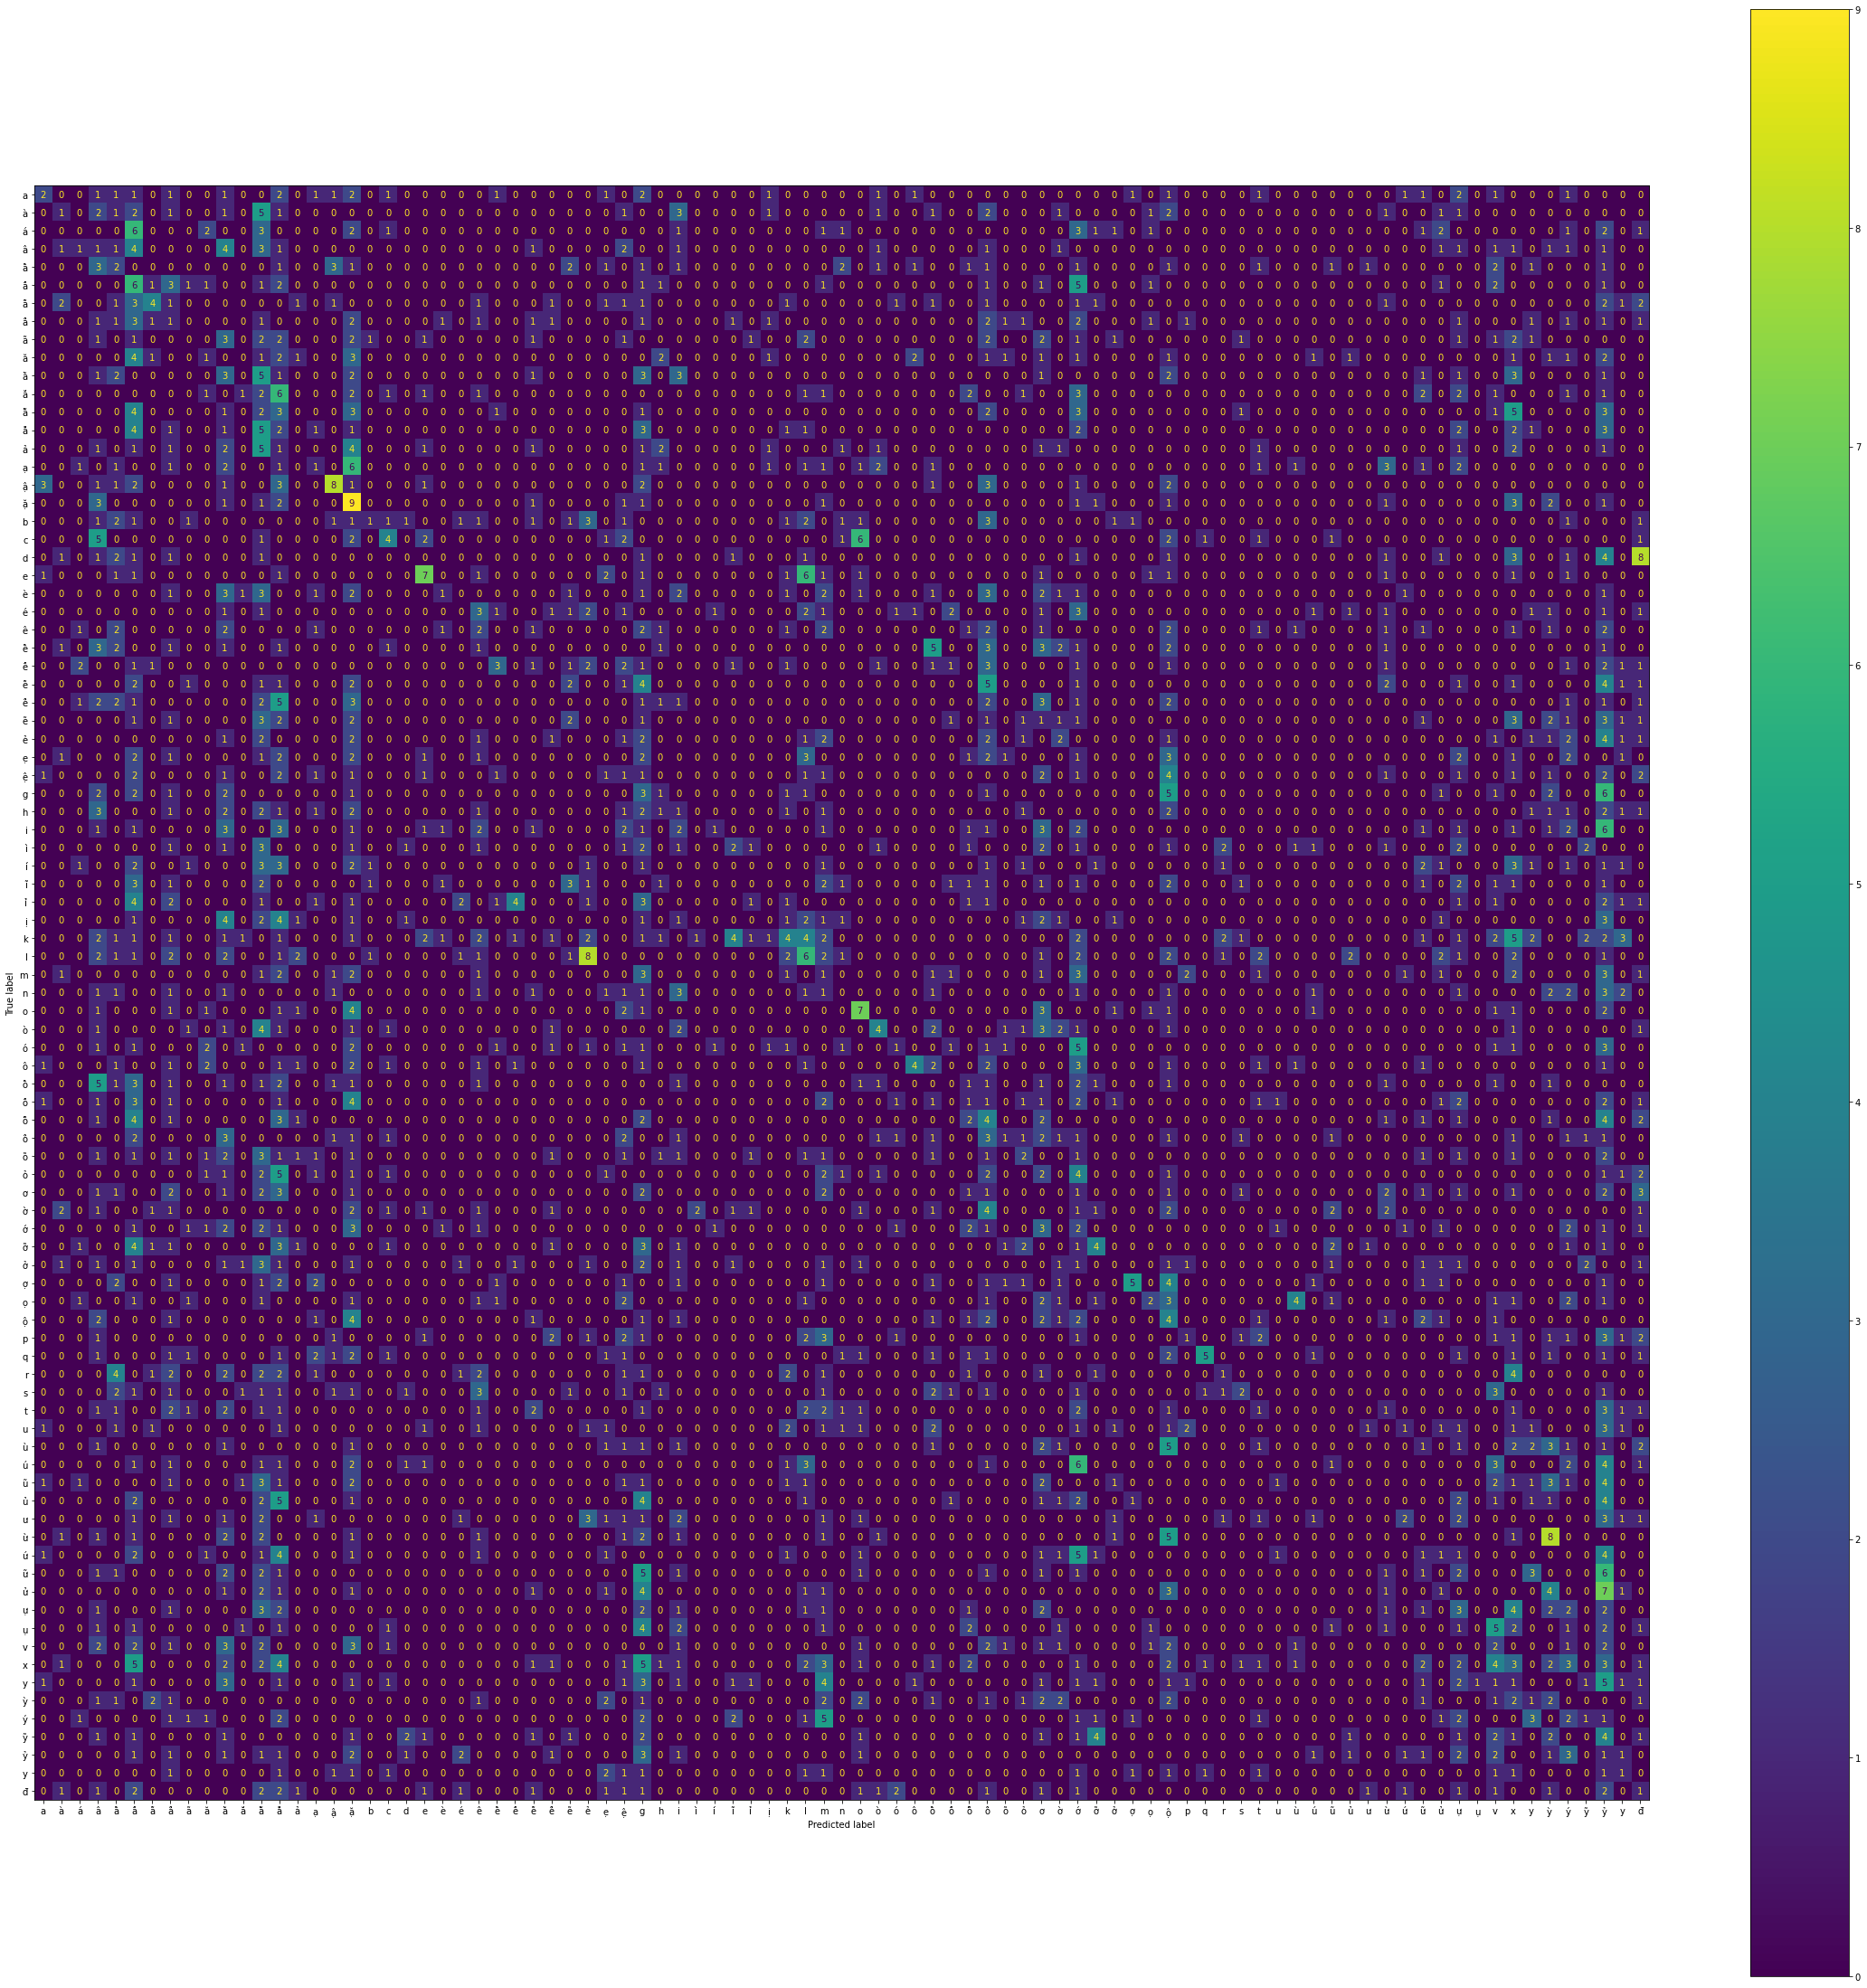

              precision    recall  f1-score   support

           a       0.15      0.07      0.09        30
          à       0.07      0.03      0.05        30
          á       0.00      0.00      0.00        30
          â       0.01      0.03      0.02        30
         ầ       0.05      0.07      0.06        30
         ấ       0.05      0.20      0.09        30
         ẫ       0.29      0.13      0.18        30
         ẩ       0.02      0.03      0.02        30
          ã       0.00      0.00      0.00        30
          ă       0.07      0.03      0.04        30
         ằ       0.04      0.10      0.06        30
         ắ       0.12      0.03      0.05        30
         ẵ       0.02      0.07      0.03        30
         ẳ       0.02      0.07      0.03        30
          ả       0.00      0.00      0.00        30
          ạ       0.06      0.03      0.04        30
         ậ       0.36      0.27      0.31        30
         ặ       0.08    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

# Sử dụng model Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


	Validation
Accuracy:  0.31300268096514744


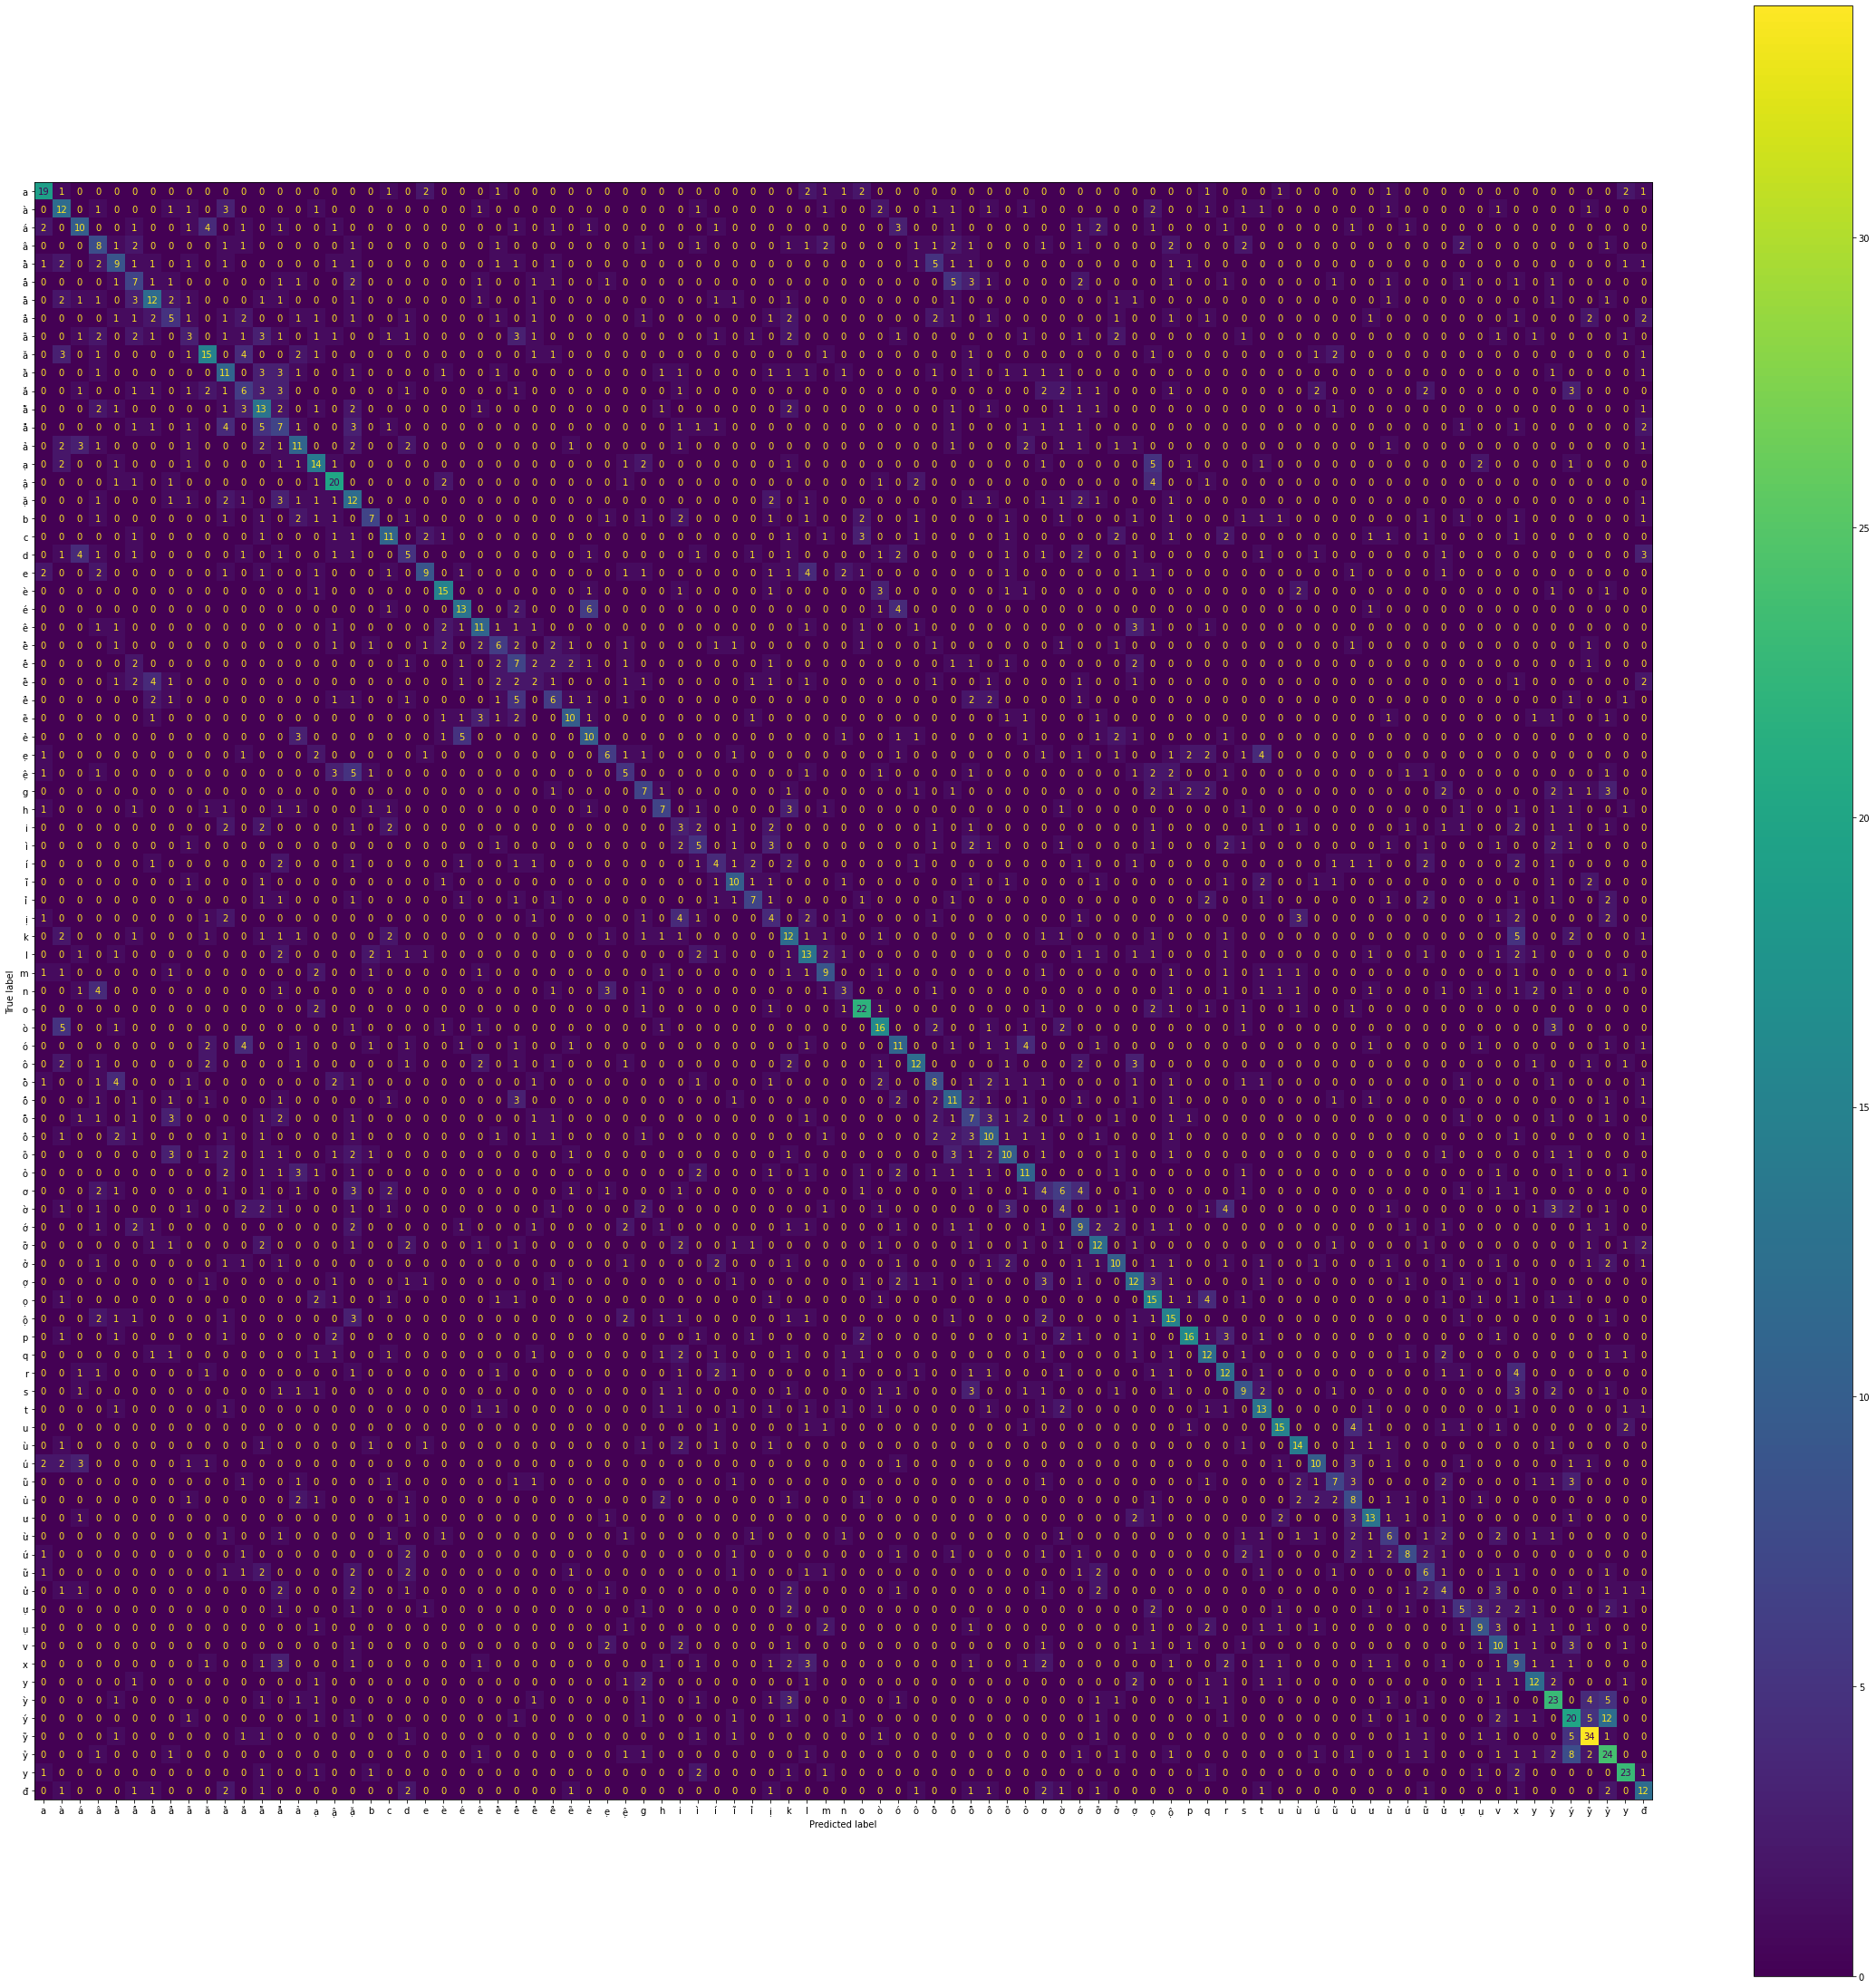

              precision    recall  f1-score   support

           a       0.54      0.53      0.54        36
          à       0.27      0.33      0.30        36
          á       0.33      0.28      0.30        36
          â       0.19      0.23      0.21        35
         ầ       0.28      0.26      0.27        35
         ấ       0.19      0.19      0.19        36
         ẫ       0.39      0.33      0.36        36
         ẩ       0.21      0.14      0.17        36
          ã       0.14      0.08      0.11        36
          ă       0.44      0.42      0.43        36
         ằ       0.23      0.31      0.27        36
         ắ       0.19      0.17      0.18        36
         ẵ       0.24      0.36      0.29        36
         ẳ       0.15      0.19      0.17        36
          ả       0.30      0.31      0.30        36
          ạ       0.34      0.39      0.36        36
         ậ       0.48      0.57      0.52        35
         ặ       0.19    

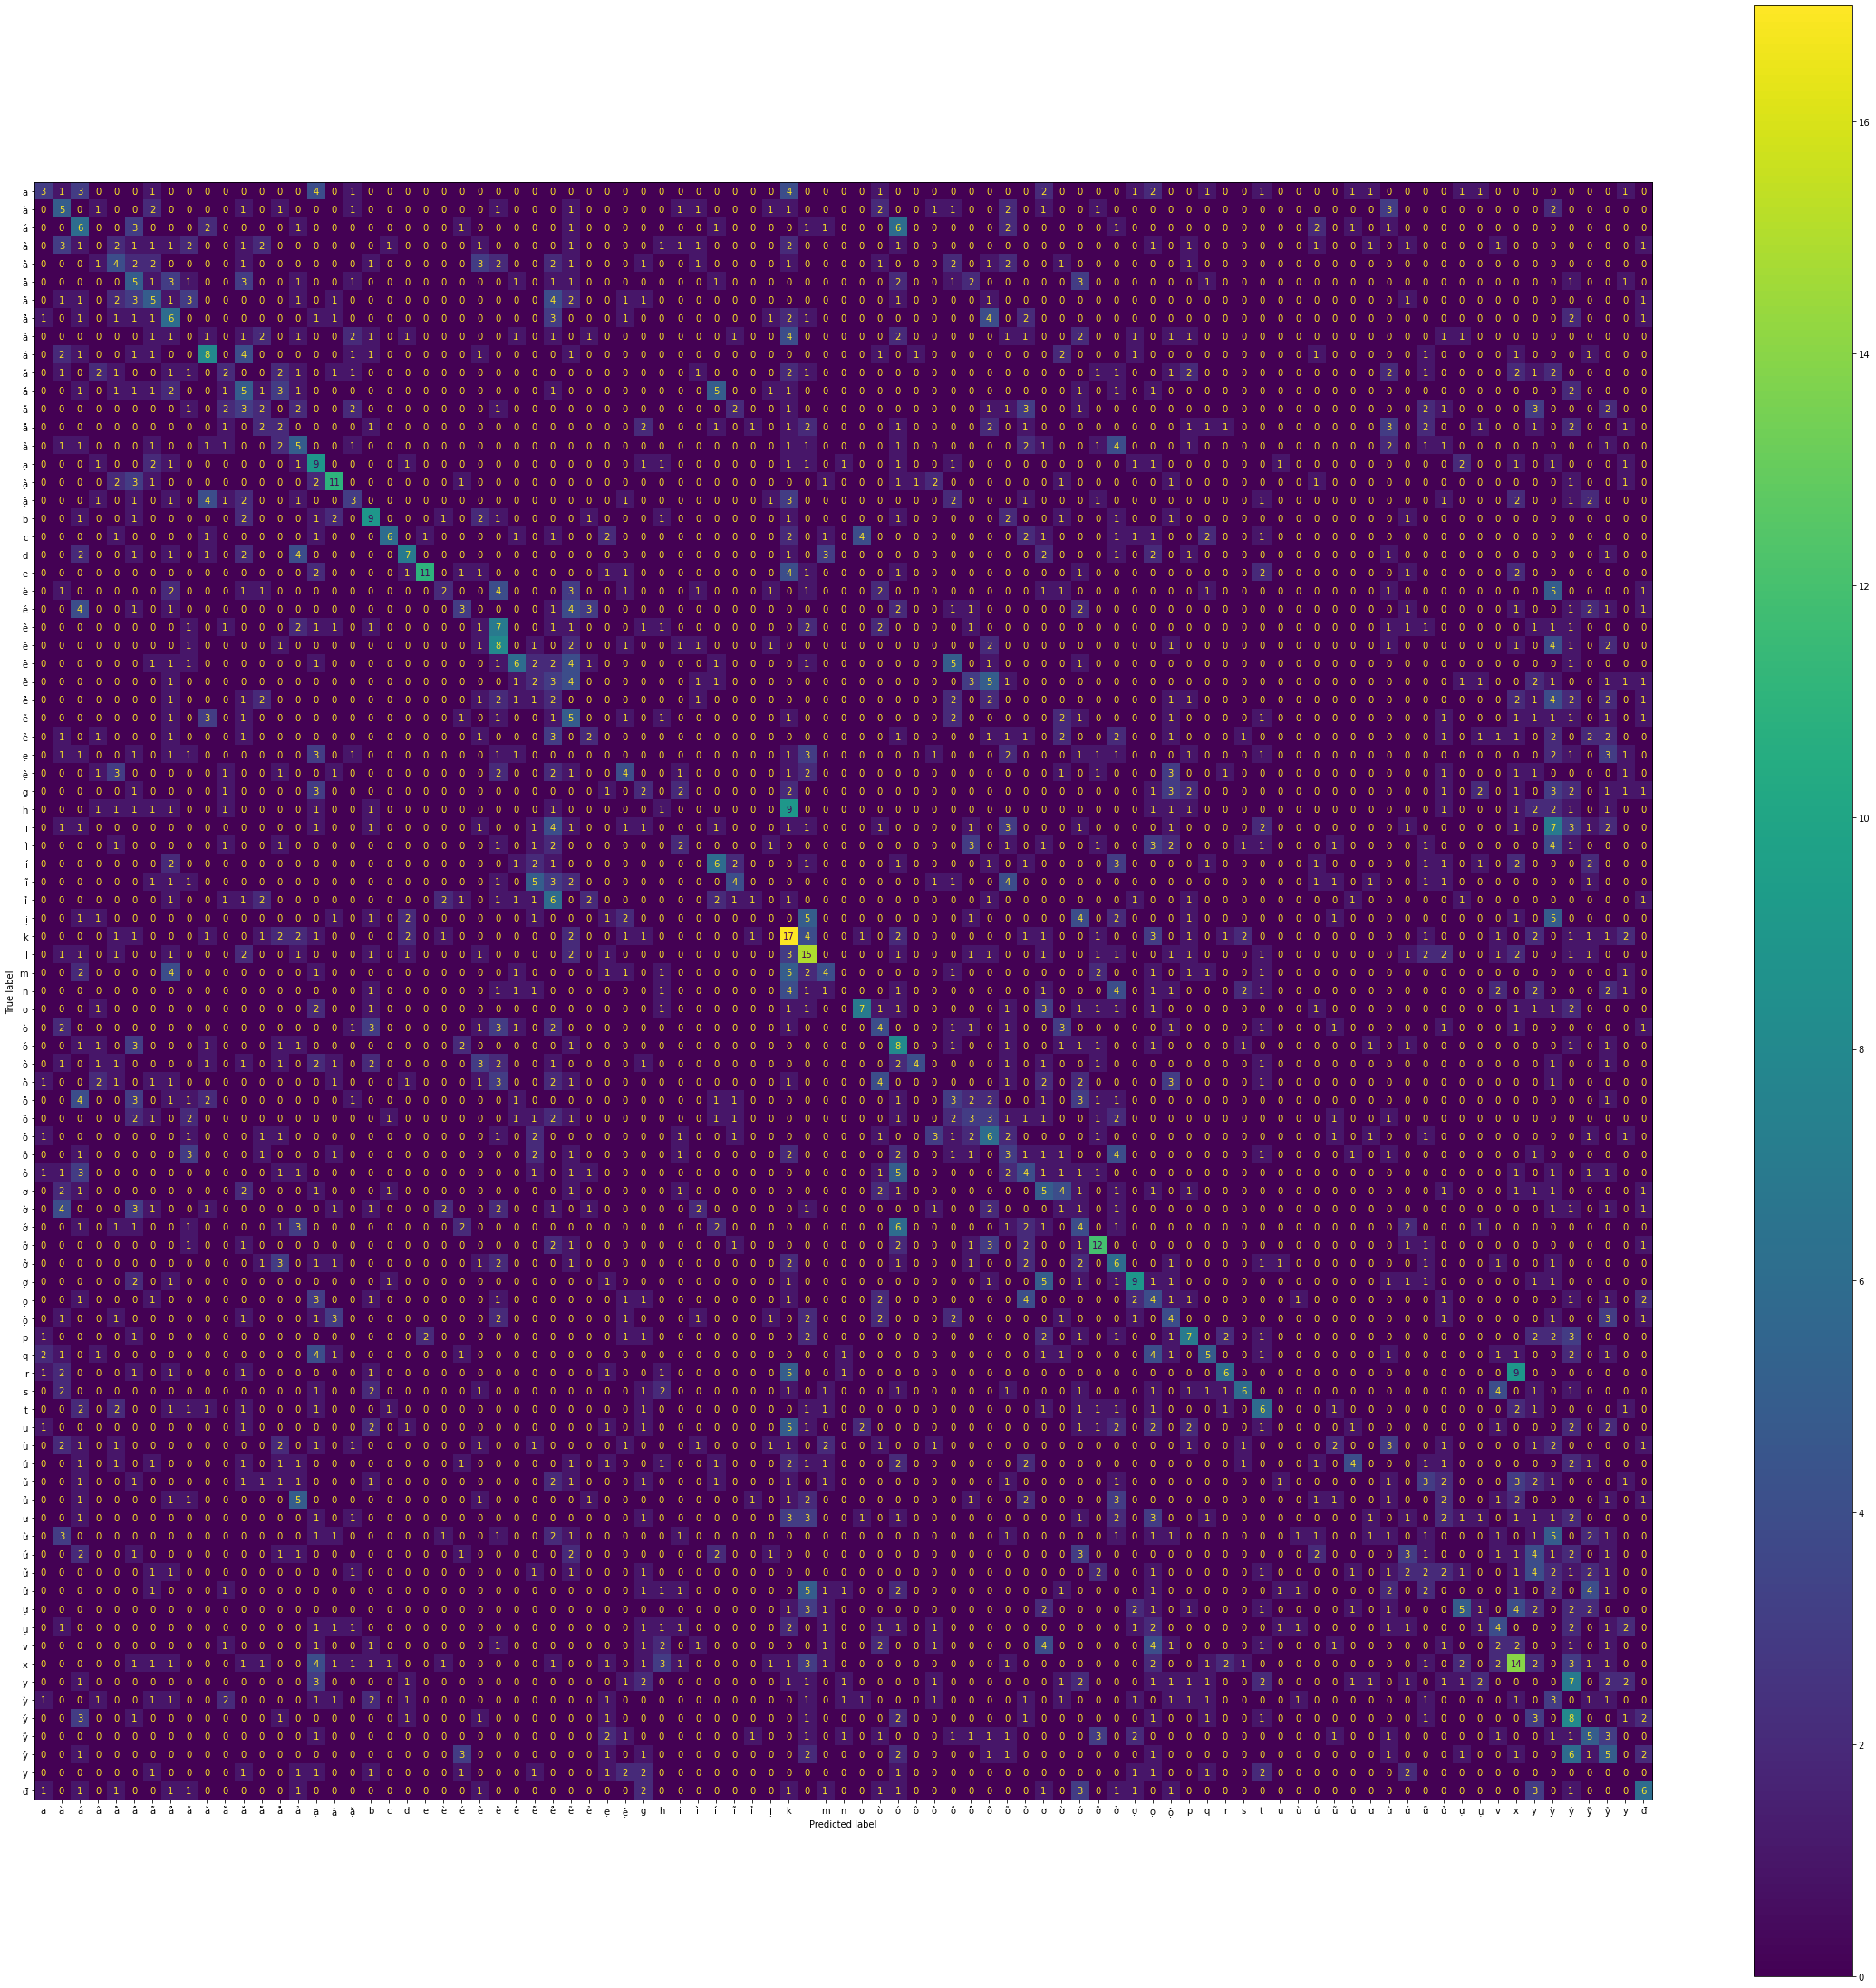

              precision    recall  f1-score   support

           a       0.21      0.10      0.14        30
          à       0.12      0.17      0.14        30
          á       0.11      0.20      0.14        30
          â       0.00      0.00      0.00        30
         ầ       0.13      0.13      0.13        30
         ấ       0.10      0.17      0.13        30
         ẫ       0.15      0.17      0.16        30
         ẩ       0.13      0.20      0.16        30
          ã       0.00      0.00      0.00        30
          ă       0.29      0.27      0.28        30
         ằ       0.11      0.07      0.08        30
         ắ       0.11      0.17      0.14        30
         ẵ       0.10      0.07      0.08        30
         ẳ       0.07      0.07      0.07        30
          ả       0.13      0.17      0.14        30
          ạ       0.14      0.30      0.19        30
         ậ       0.34      0.37      0.35        30
         ặ       0.14    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

# Sử dụng model SVM

## Linear kernel

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=1000,kernel='linear')
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.3203753351206434


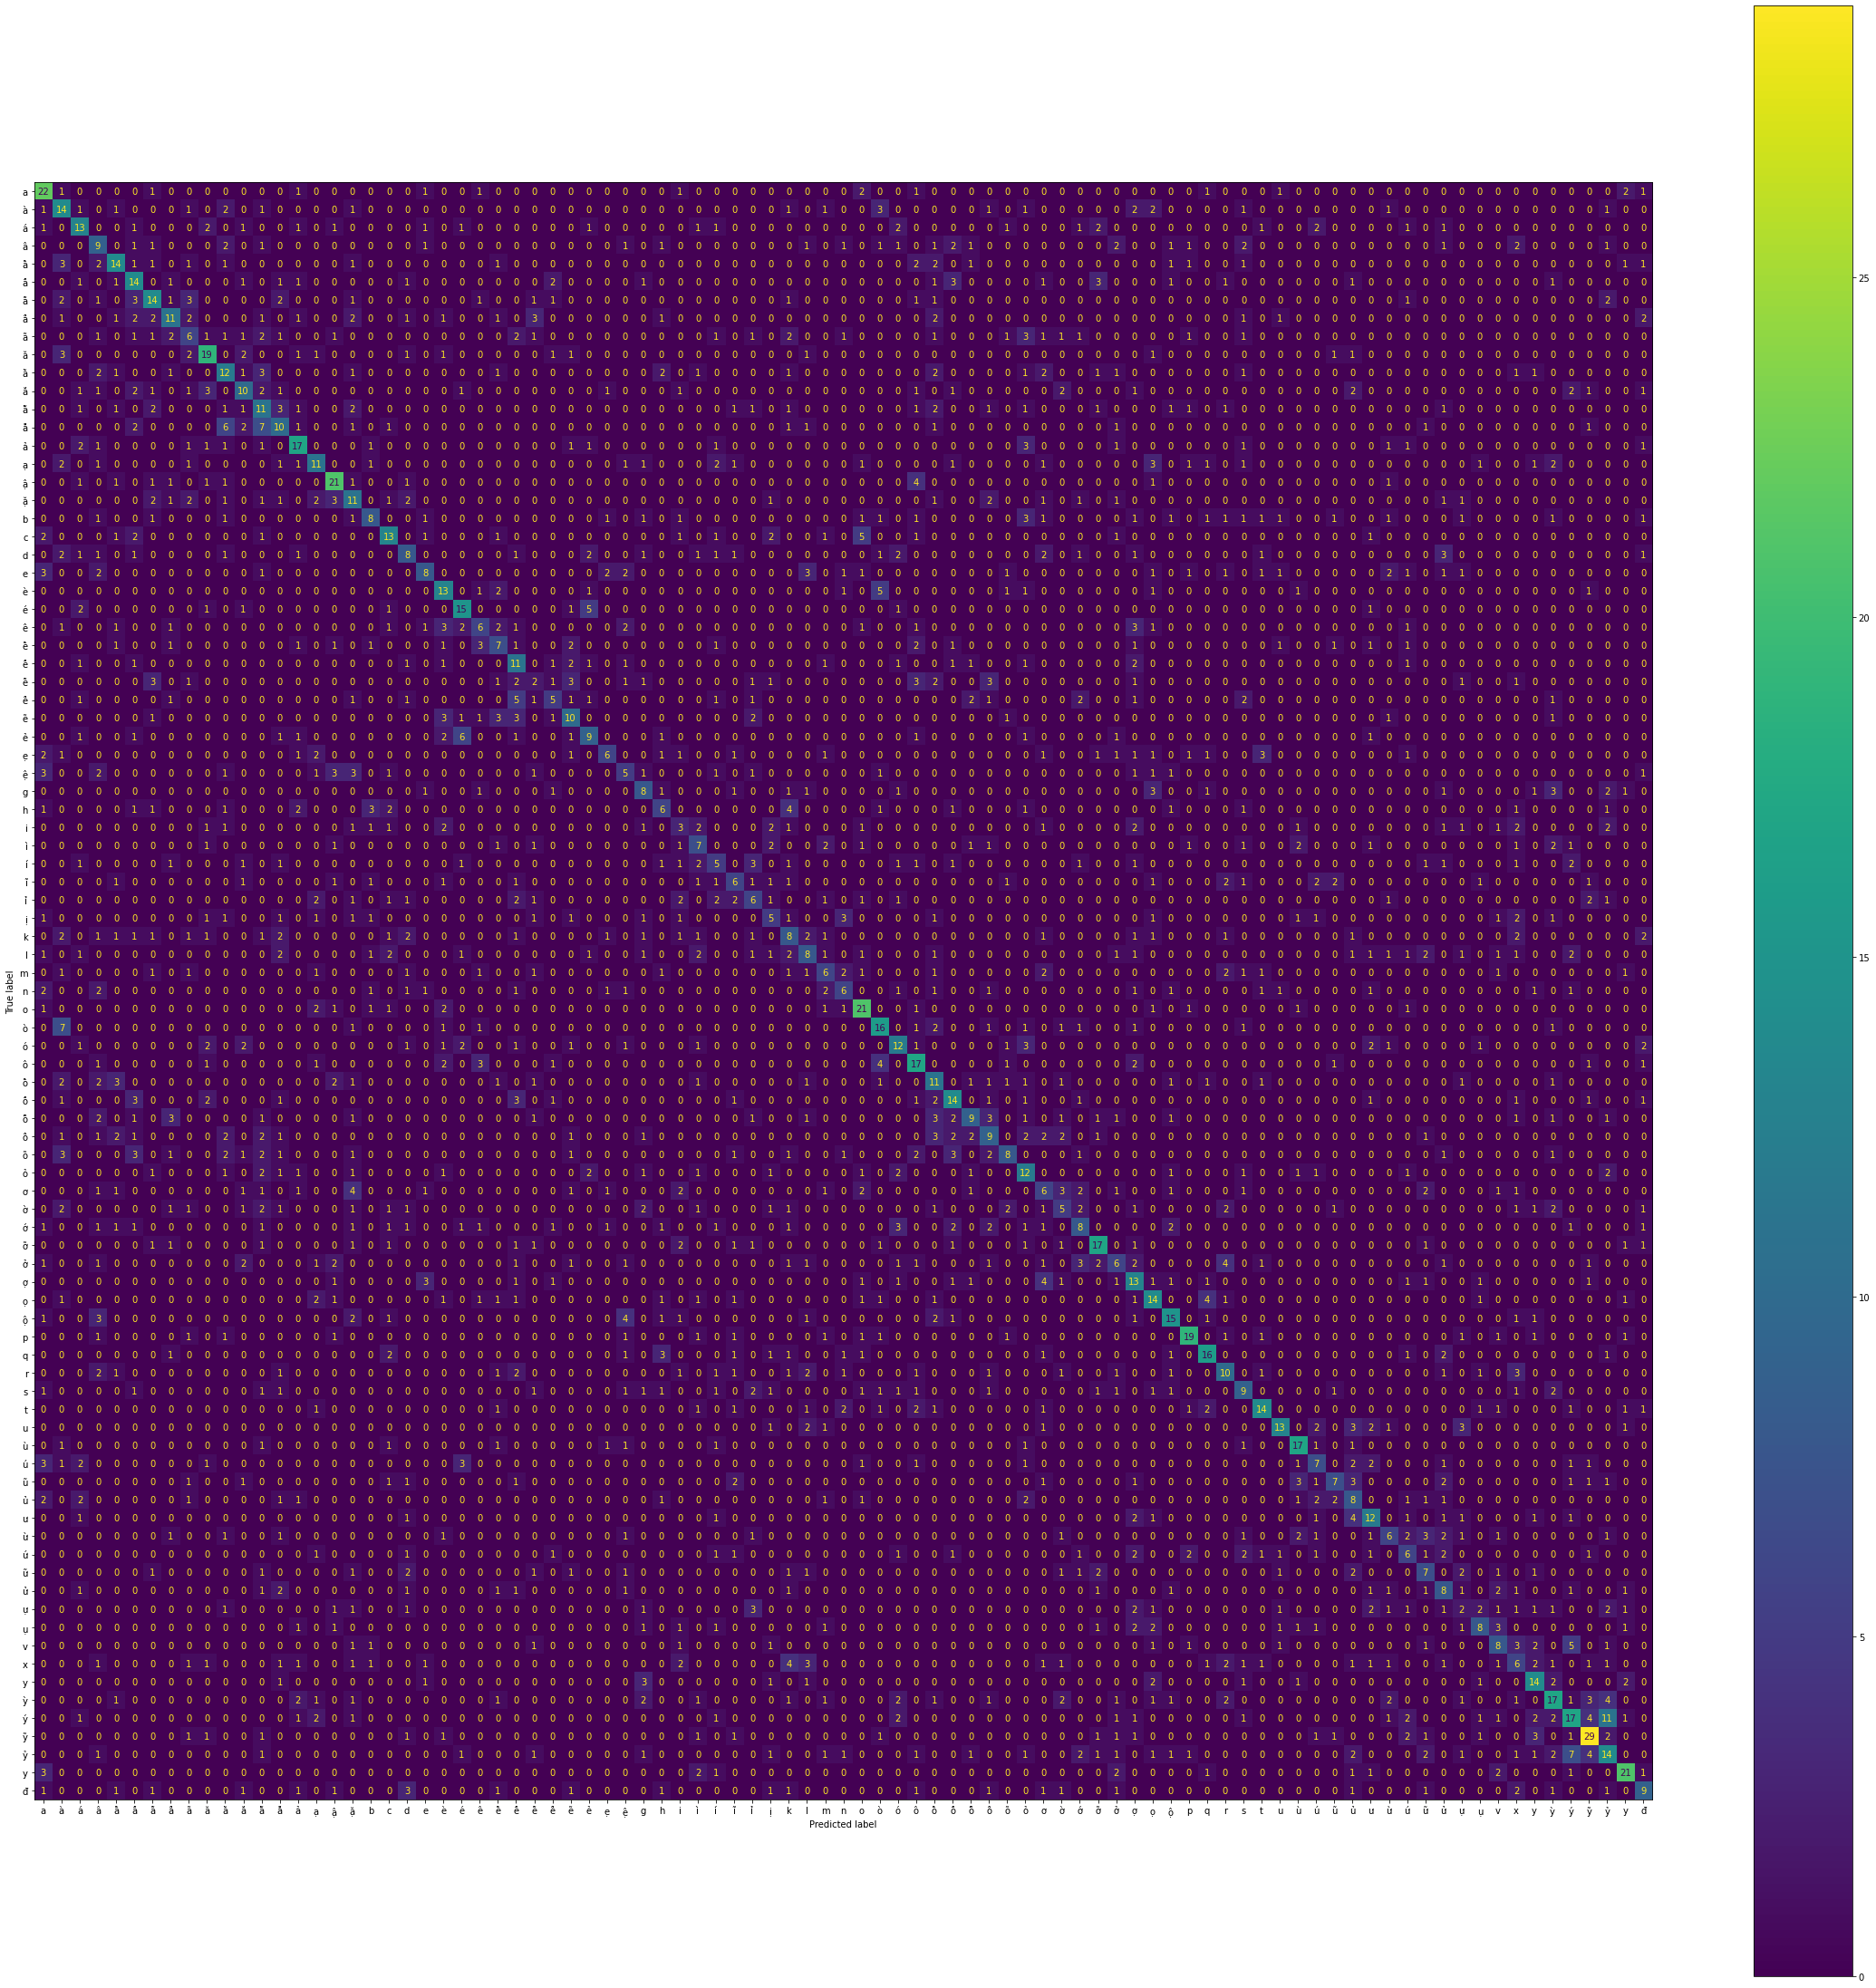

              precision    recall  f1-score   support

           a       0.42      0.61      0.49        36
          à       0.27      0.39      0.32        36
          á       0.36      0.36      0.36        36
          â       0.20      0.26      0.23        35
         ầ       0.40      0.40      0.40        35
         ấ       0.32      0.39      0.35        36
         ẫ       0.37      0.39      0.38        36
         ẩ       0.37      0.31      0.33        36
          ã       0.21      0.17      0.18        36
          ă       0.47      0.53      0.50        36
         ằ       0.29      0.33      0.31        36
         ắ       0.32      0.28      0.30        36
         ẵ       0.22      0.31      0.25        36
         ẳ       0.25      0.28      0.26        36
          ả       0.42      0.47      0.45        36
          ạ       0.34      0.31      0.32        36
         ậ       0.49      0.60      0.54        35
         ặ       0.22    

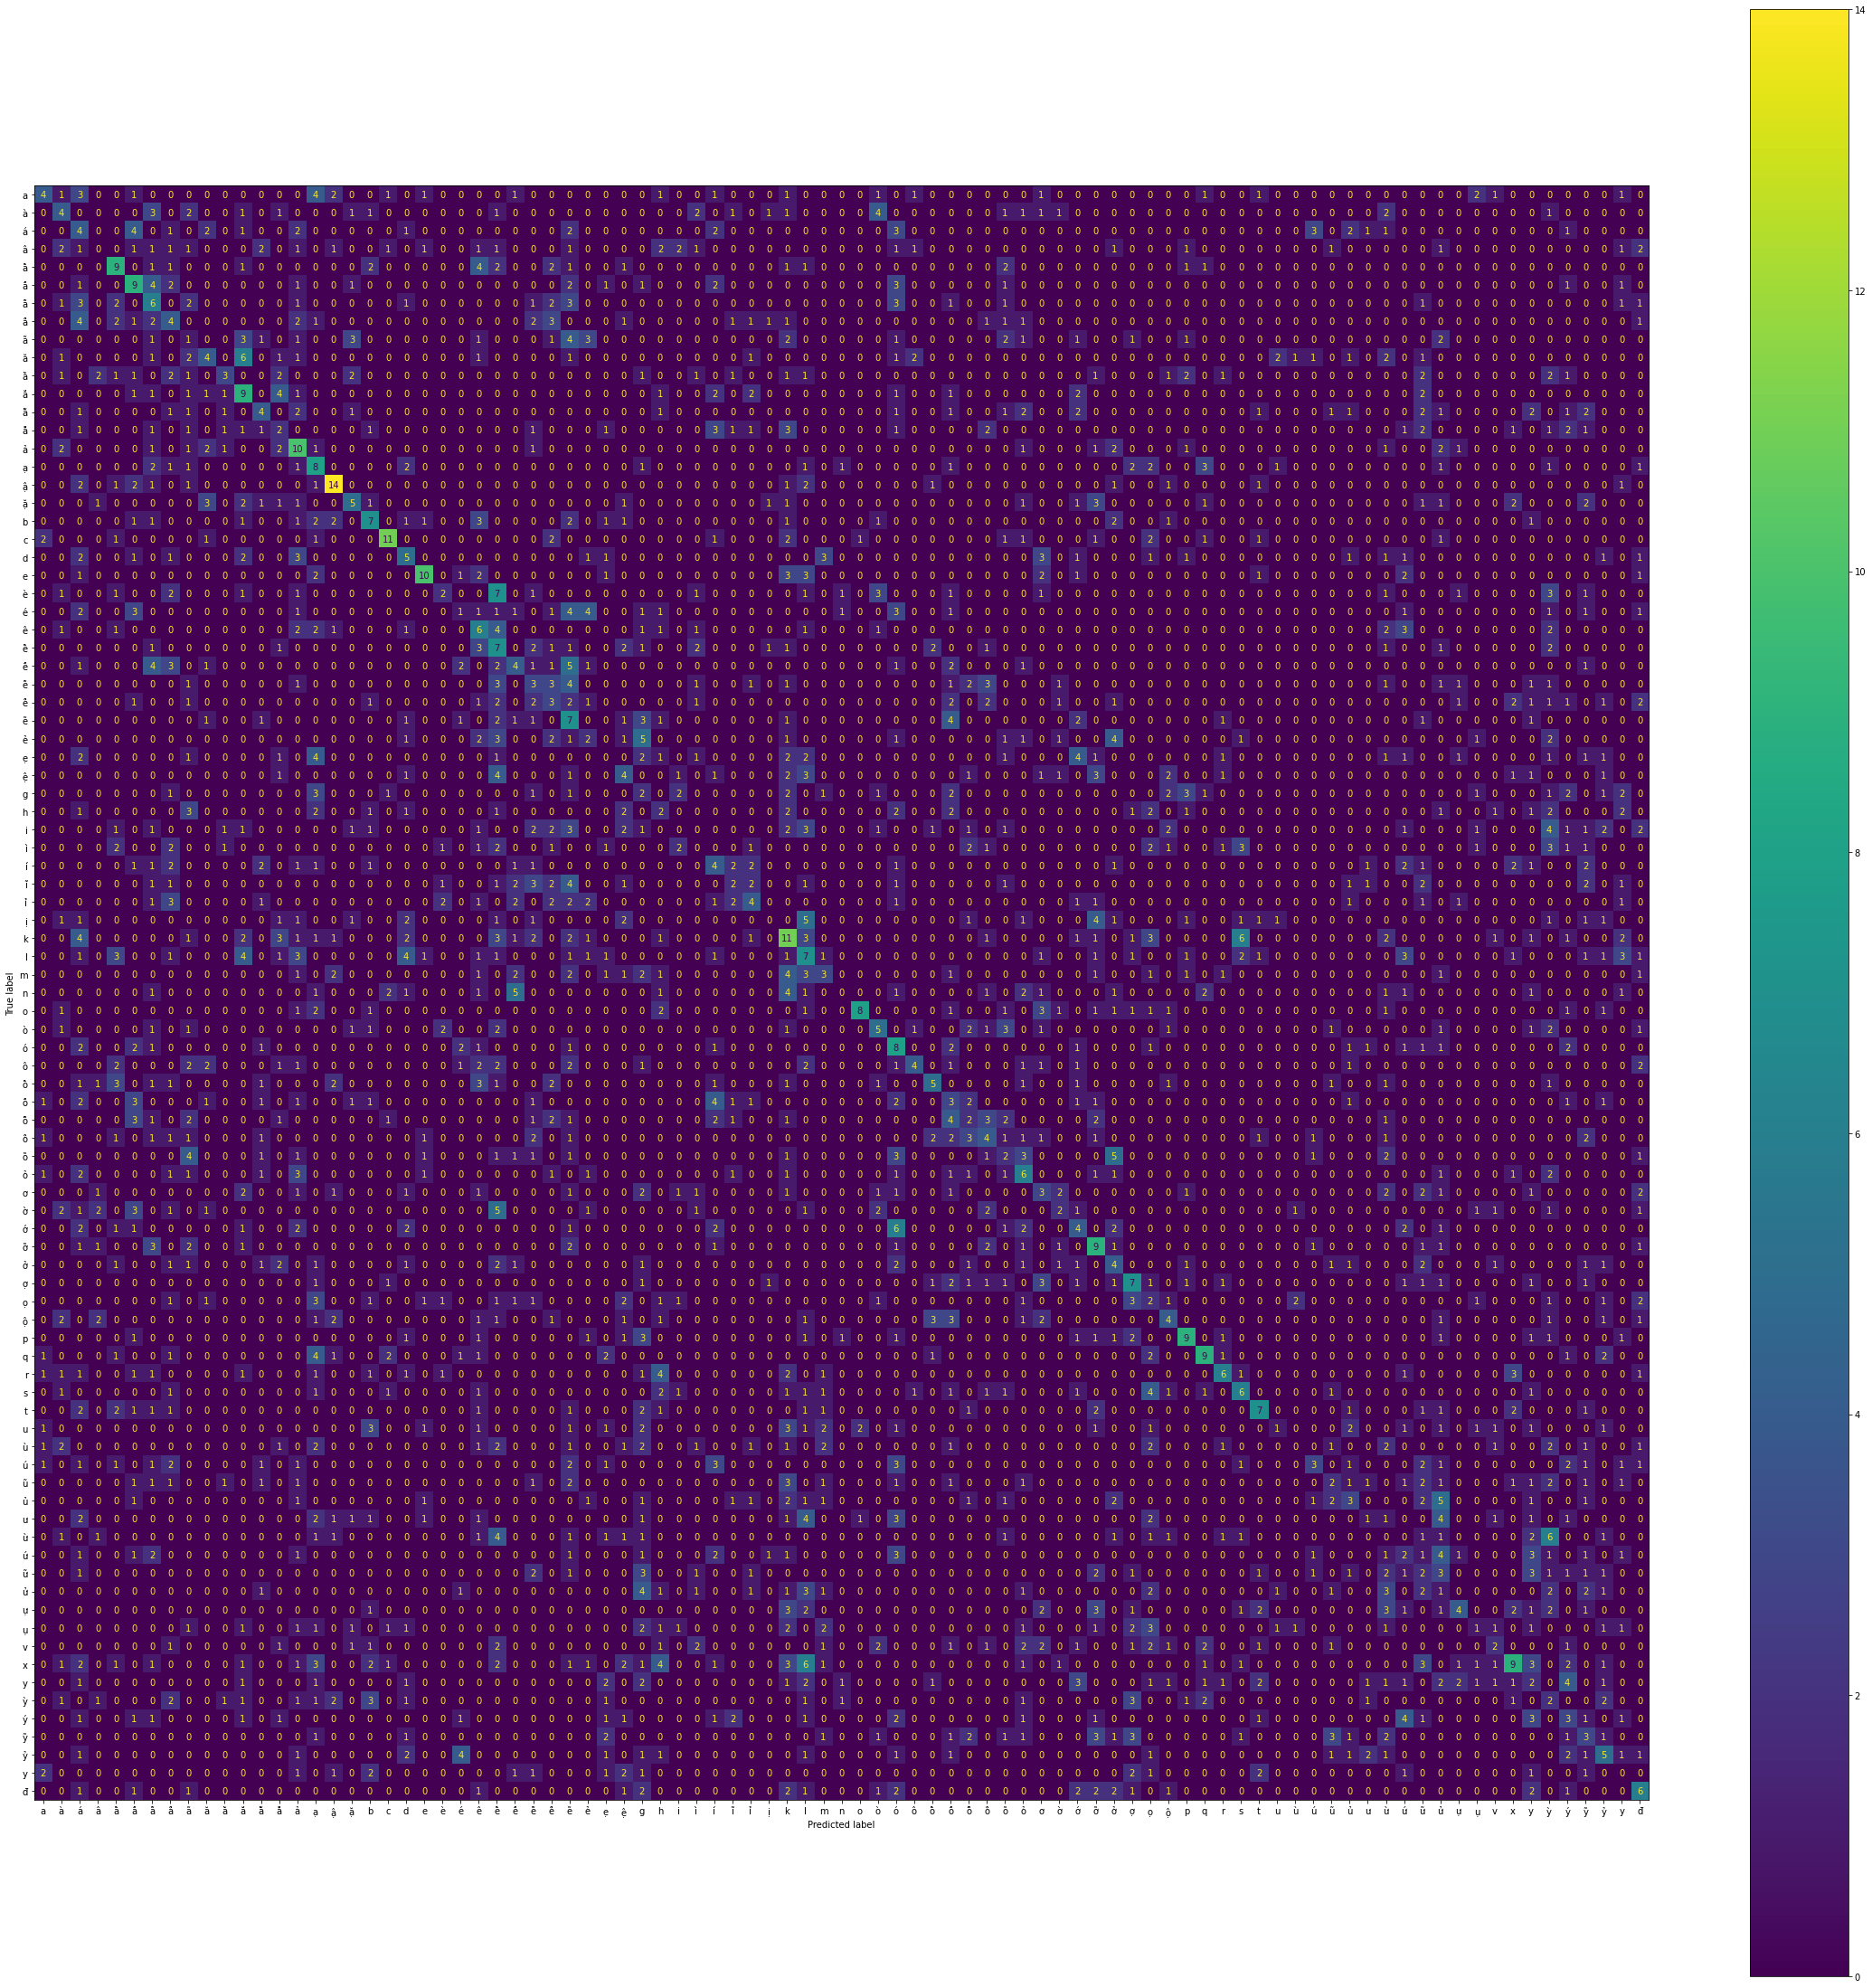

              precision    recall  f1-score   support

           a       0.25      0.13      0.17        30
          à       0.14      0.13      0.14        30
          á       0.07      0.13      0.09        30
          â       0.00      0.00      0.00        30
         ầ       0.24      0.30      0.27        30
         ấ       0.19      0.30      0.23        30
         ẫ       0.12      0.20      0.15        30
         ẩ       0.09      0.13      0.11        30
          ã       0.03      0.03      0.03        30
          ă       0.20      0.13      0.16        30
         ằ       0.27      0.10      0.15        30
         ắ       0.20      0.30      0.24        30
         ẵ       0.17      0.13      0.15        30
         ẳ       0.07      0.07      0.07        30
          ả       0.17      0.33      0.22        30
          ạ       0.13      0.27      0.18        30
         ậ       0.41      0.47      0.44        30
         ặ       0.25    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

## Polynomial kernel

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=1000,kernel='poly')
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.40013404825737264


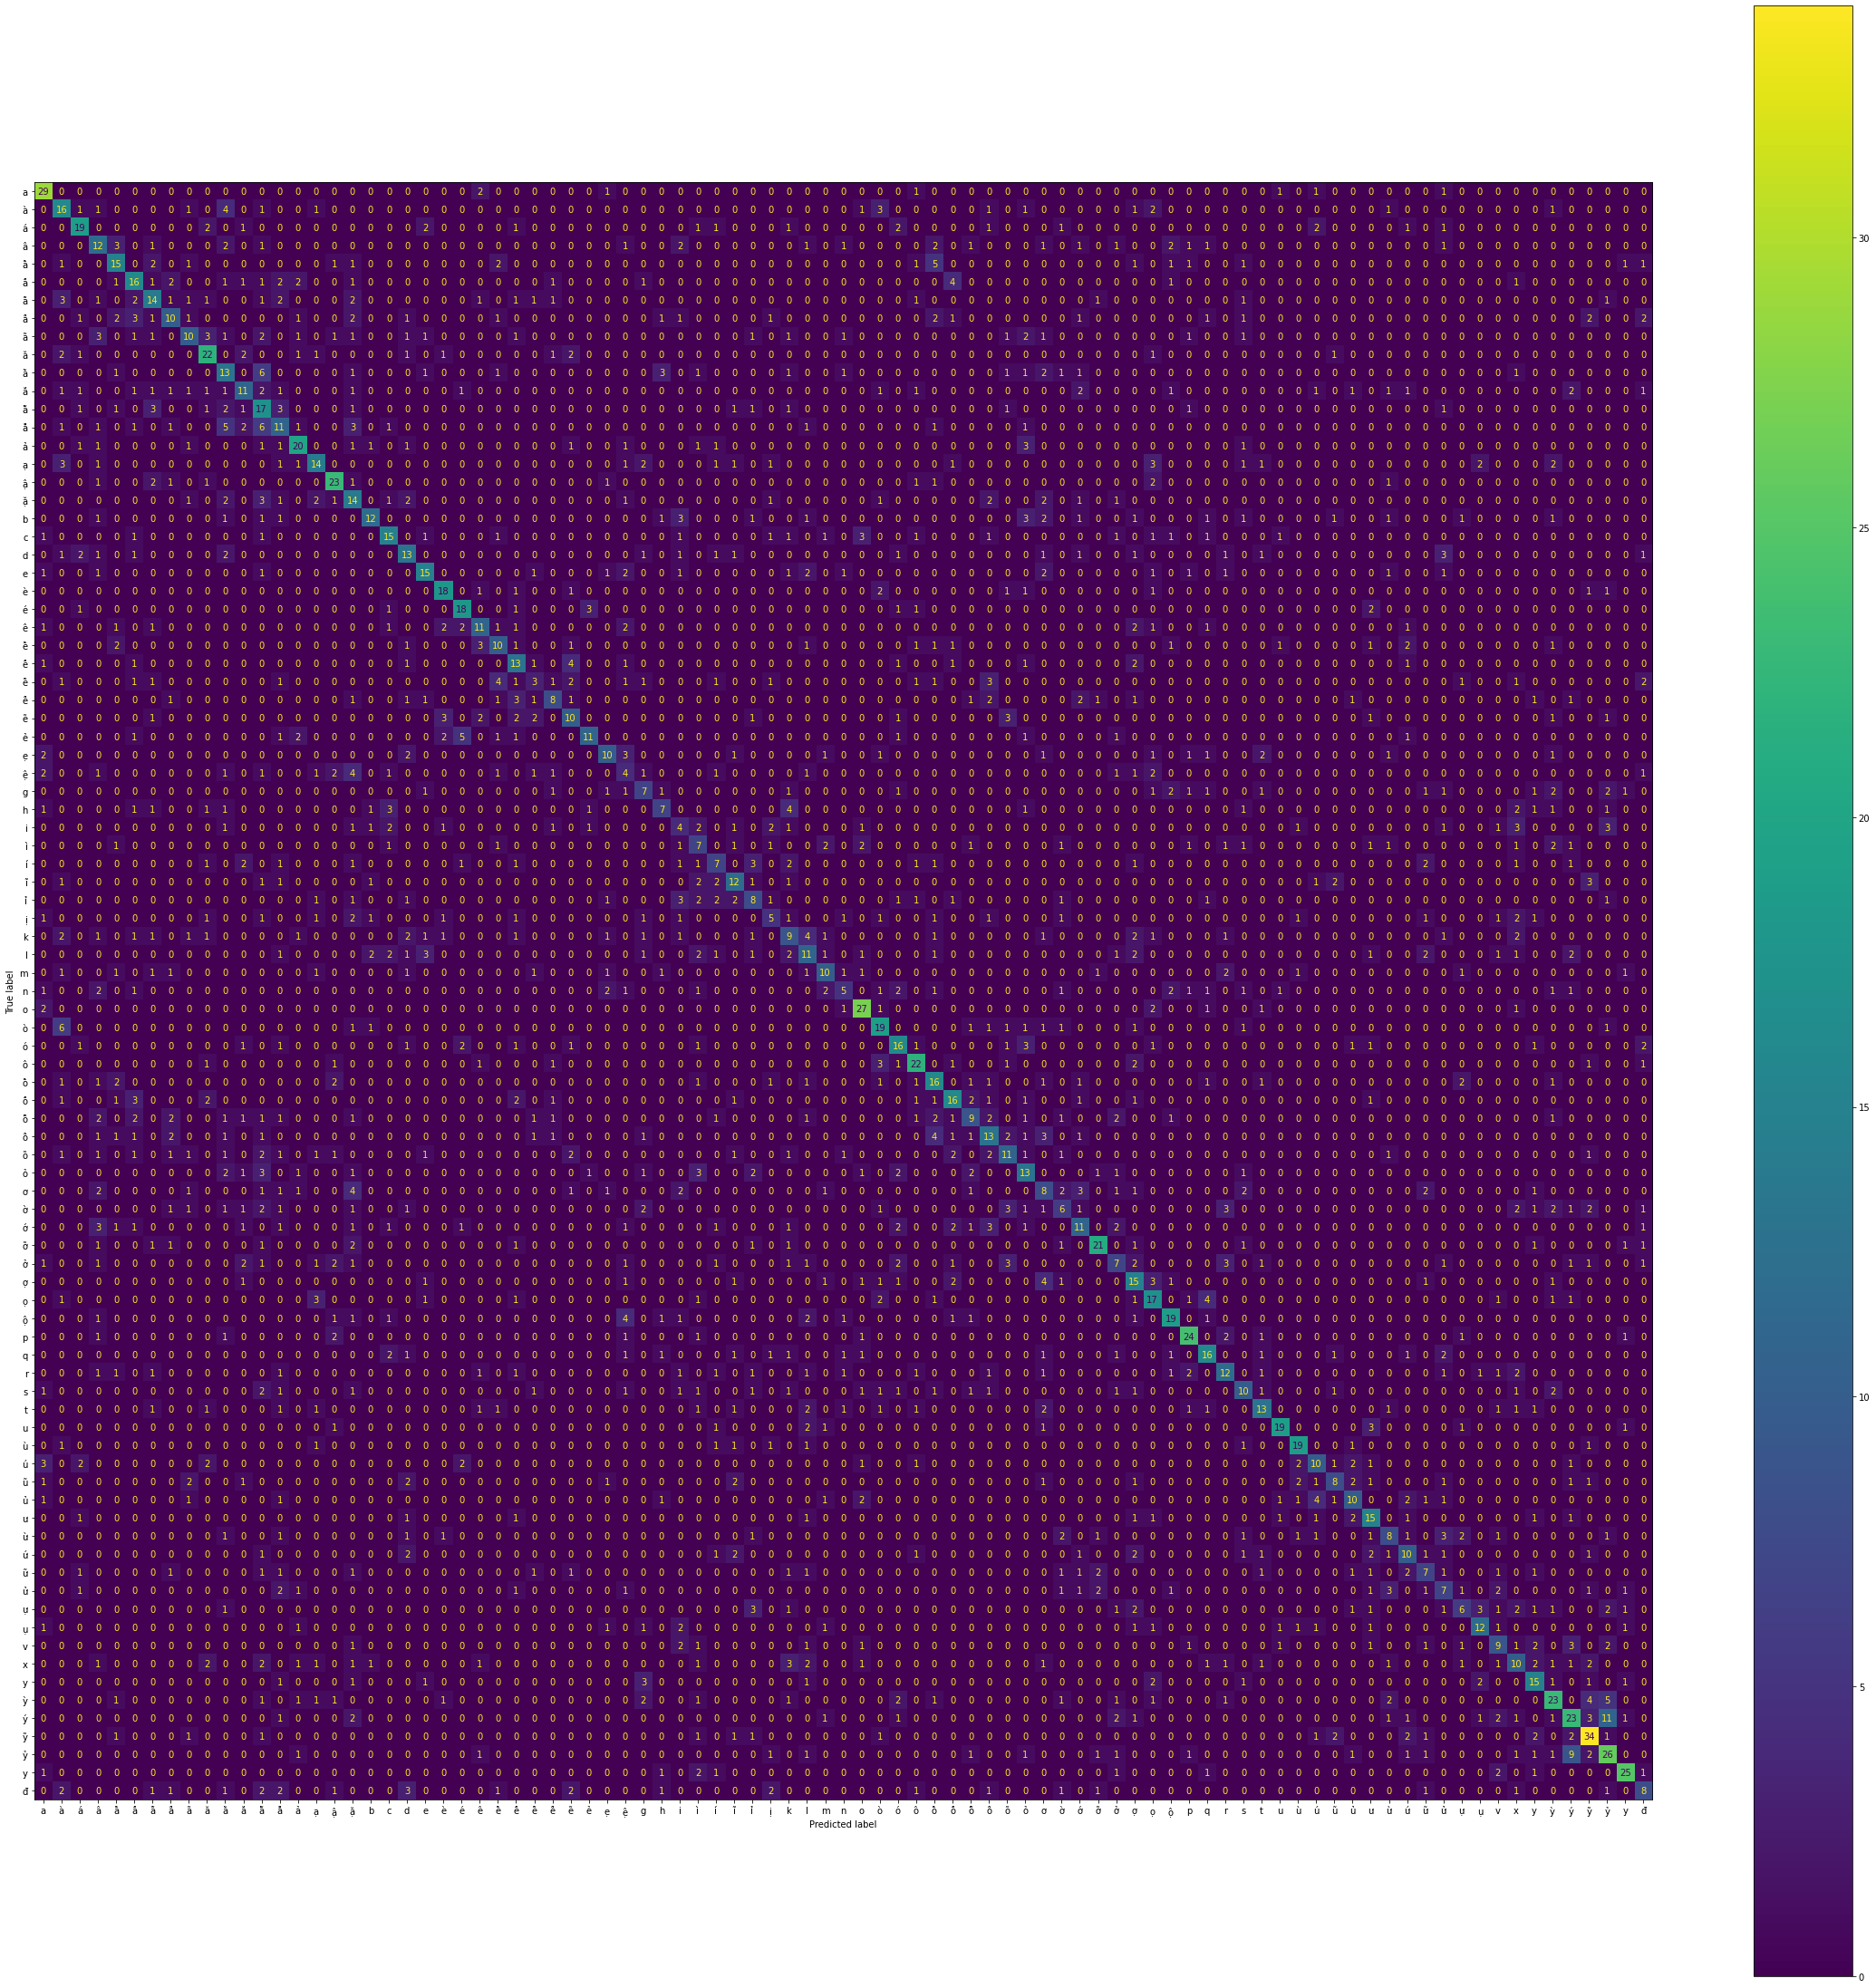

              precision    recall  f1-score   support

           a       0.57      0.81      0.67        36
          à       0.35      0.44      0.39        36
          á       0.56      0.53      0.54        36
          â       0.27      0.34      0.30        35
         ầ       0.42      0.43      0.42        35
         ấ       0.40      0.44      0.42        36
         ẫ       0.39      0.39      0.39        36
         ẩ       0.37      0.28      0.32        36
          ã       0.40      0.28      0.33        36
          ă       0.51      0.61      0.56        36
         ằ       0.28      0.36      0.31        36
         ắ       0.38      0.31      0.34        36
         ẵ       0.25      0.47      0.32        36
         ẳ       0.24      0.31      0.27        36
          ả       0.54      0.56      0.55        36
          ạ       0.45      0.39      0.42        36
         ậ       0.57      0.66      0.61        35
         ặ       0.24    

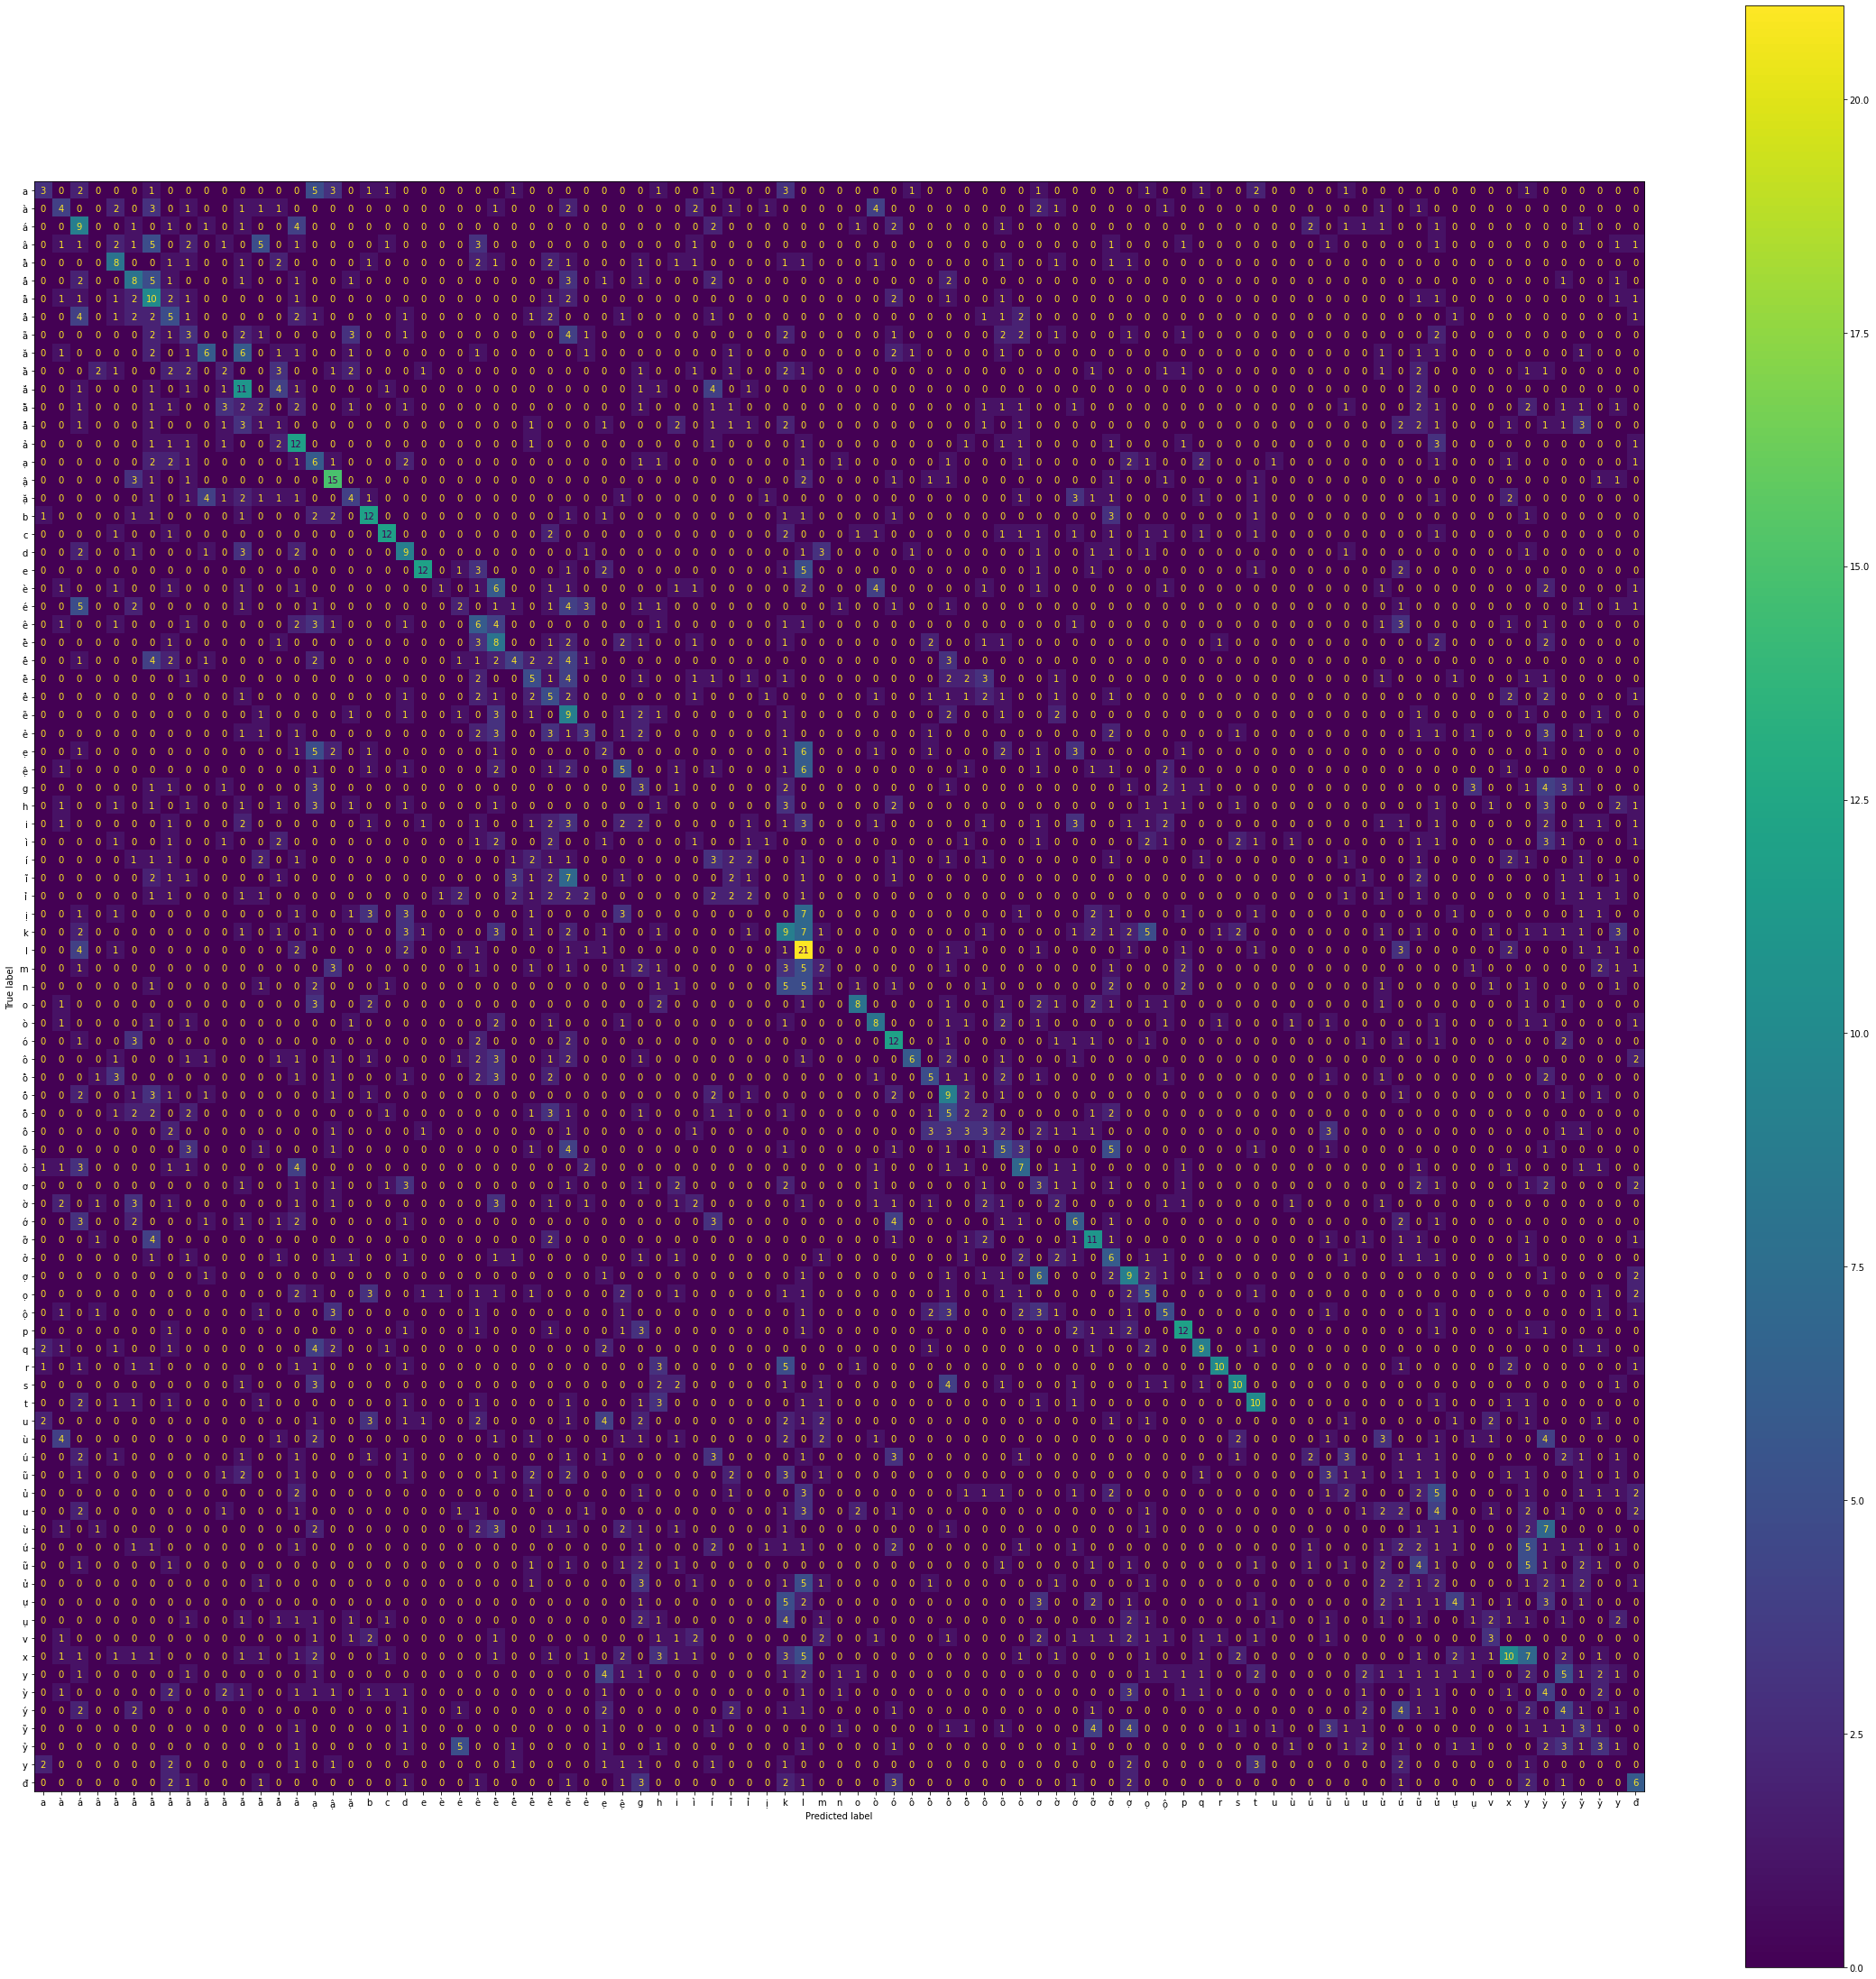

              precision    recall  f1-score   support

           a       0.25      0.10      0.14        30
          à       0.15      0.13      0.14        30
          á       0.15      0.30      0.20        30
          â       0.00      0.00      0.00        30
         ầ       0.26      0.27      0.26        30
         ấ       0.21      0.27      0.23        30
         ẫ       0.16      0.33      0.21        30
         ẩ       0.12      0.17      0.14        30
          ã       0.09      0.10      0.10        30
          ă       0.35      0.20      0.26        30
         ằ       0.12      0.07      0.09        30
         ắ       0.21      0.37      0.27        30
         ẵ       0.09      0.07      0.08        30
         ẳ       0.04      0.03      0.04        30
          ả       0.19      0.40      0.26        30
          ạ       0.10      0.20      0.14        30
         ậ       0.35      0.50      0.41        30
         ặ       0.21    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

## Radial Basis Function Kernel

In [24]:
from sklearn.svm import SVC
clf = SVC(C=8,kernel='rbf')
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

	Validation
Accuracy:  0.4313002680965147


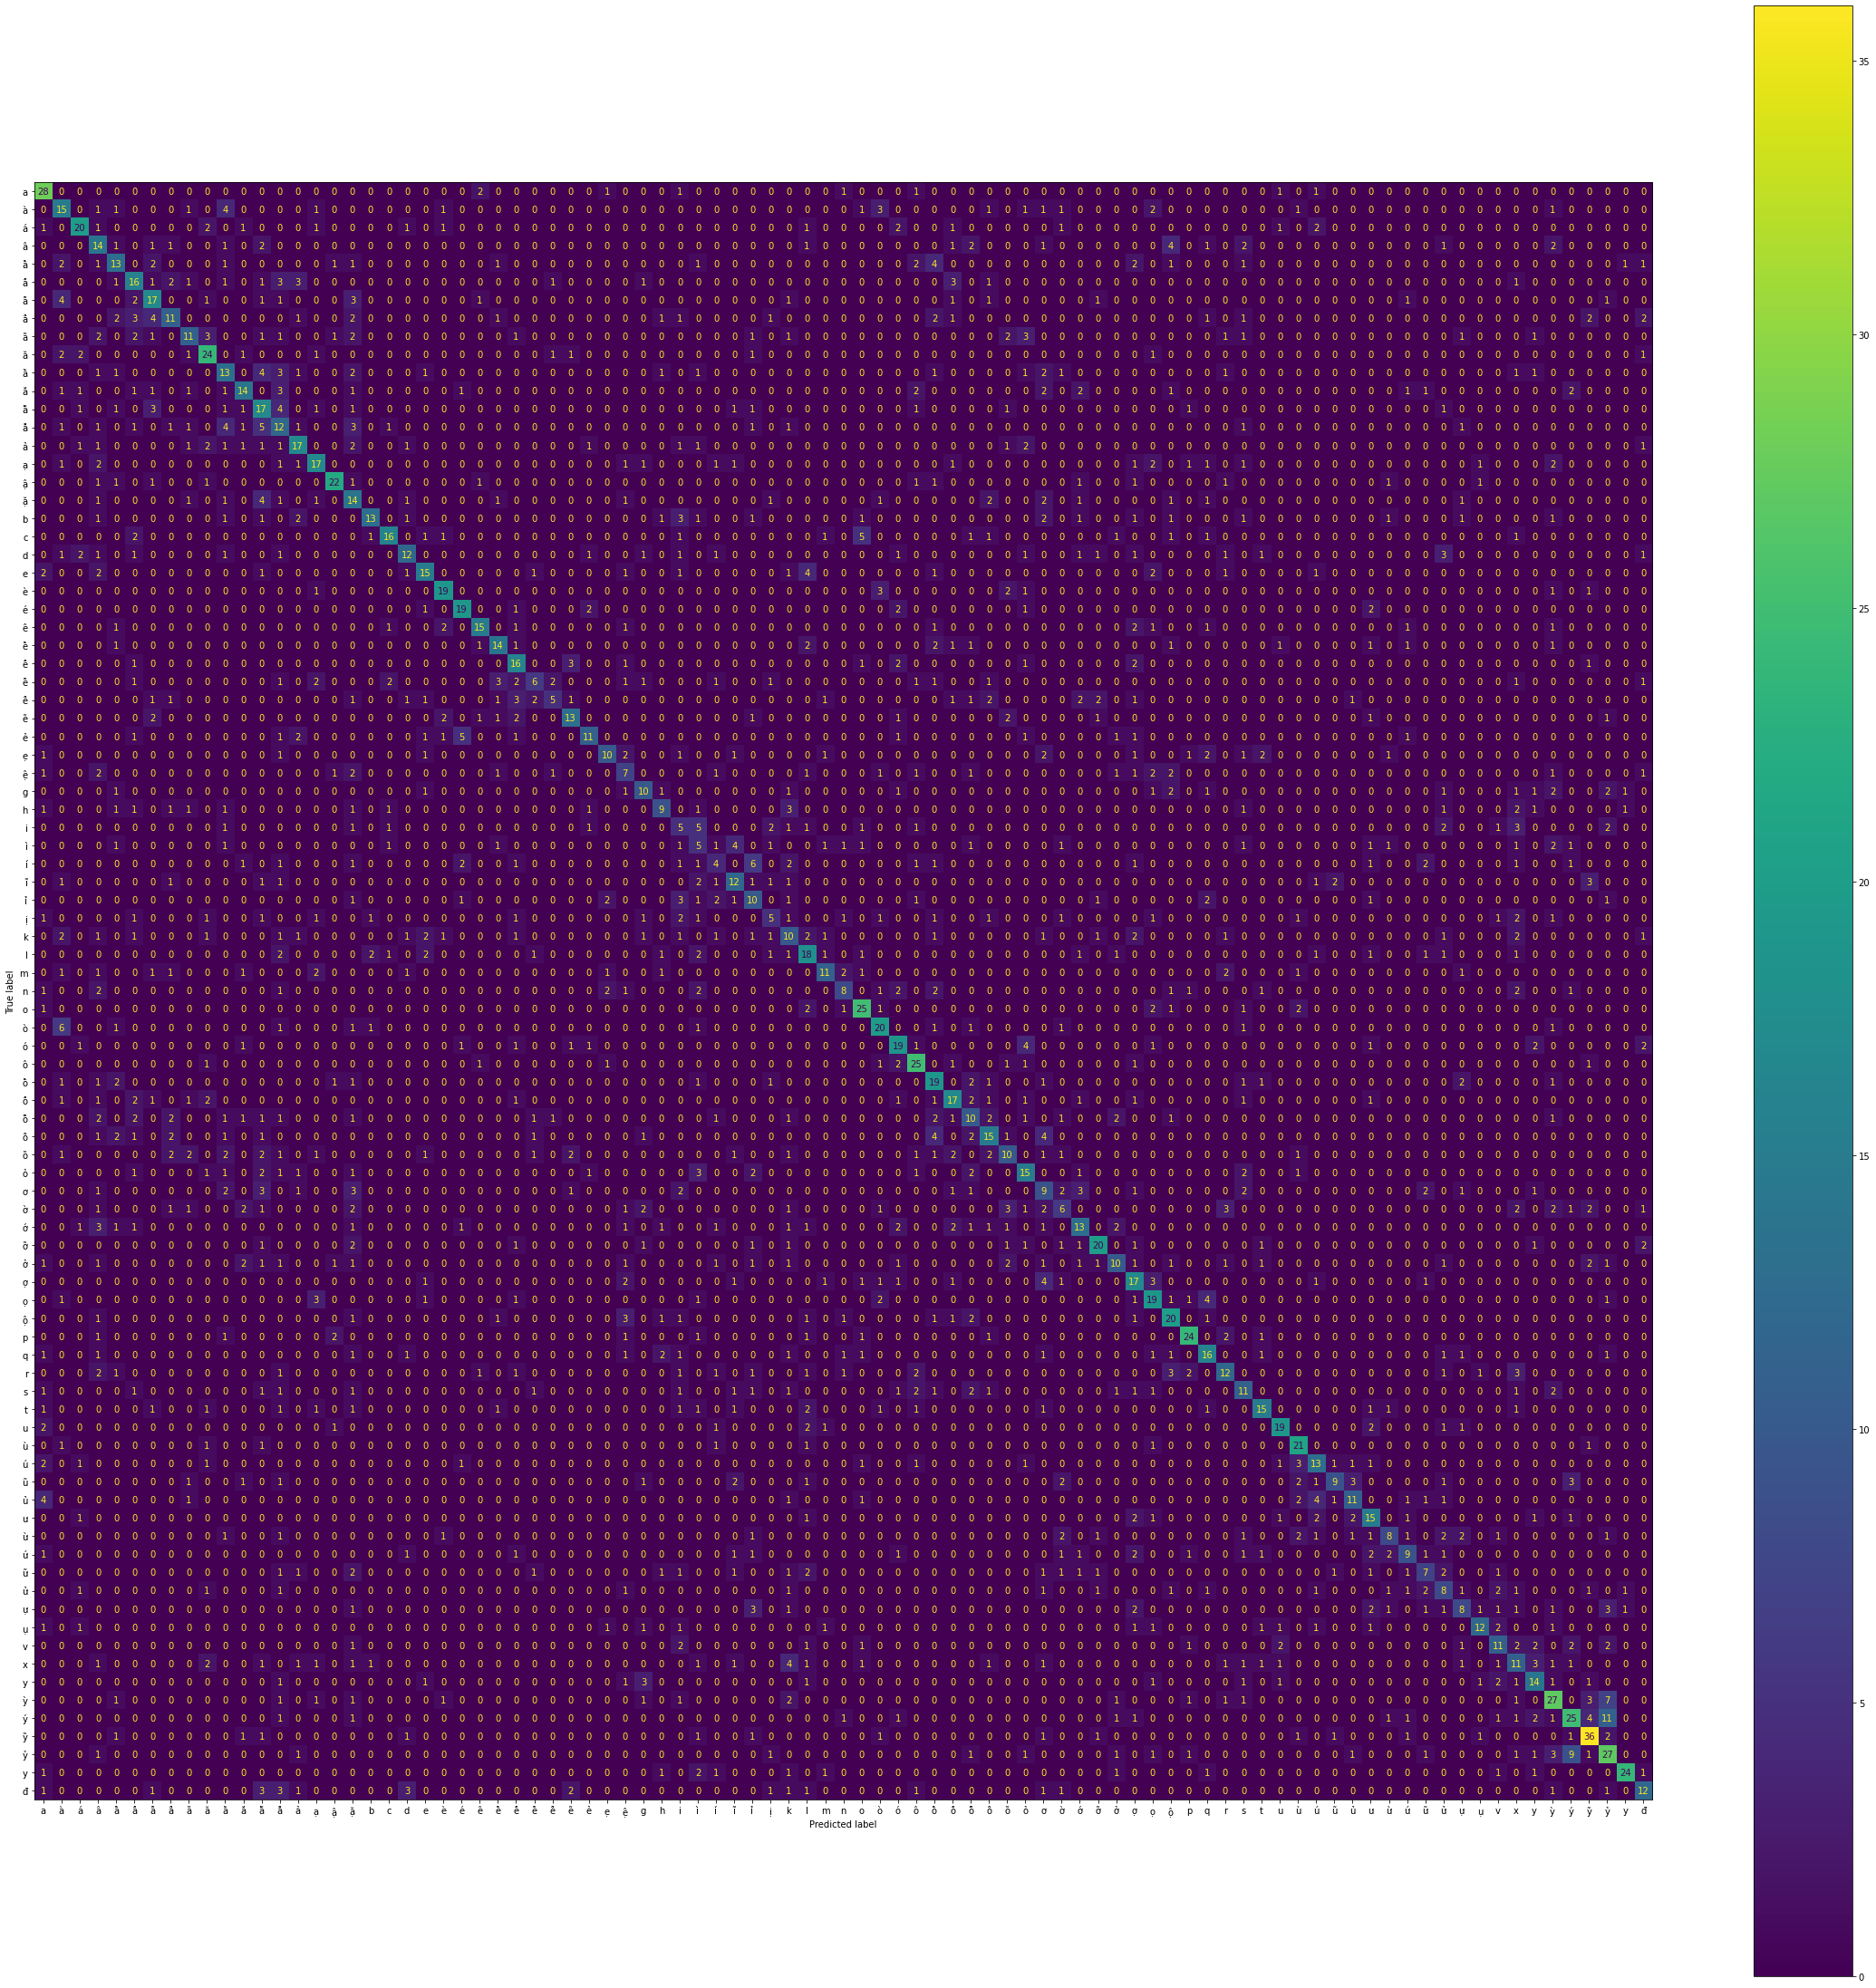

              precision    recall  f1-score   support

           a       0.53      0.78      0.63        36
          à       0.36      0.42      0.38        36
          á       0.61      0.56      0.58        36
          â       0.26      0.40      0.31        35
         ầ       0.37      0.37      0.37        35
         ấ       0.38      0.44      0.41        36
         ẫ       0.45      0.47      0.46        36
         ẩ       0.42      0.31      0.35        36
          ã       0.44      0.31      0.36        36
          ă       0.53      0.67      0.59        36
         ằ       0.31      0.36      0.33        36
         ắ       0.48      0.39      0.43        36
         ẵ       0.29      0.47      0.36        36
         ẳ       0.21      0.33      0.26        36
          ả       0.49      0.47      0.48        36
          ạ       0.49      0.47      0.48        36
         ậ       0.73      0.63      0.68        35
         ặ       0.22    

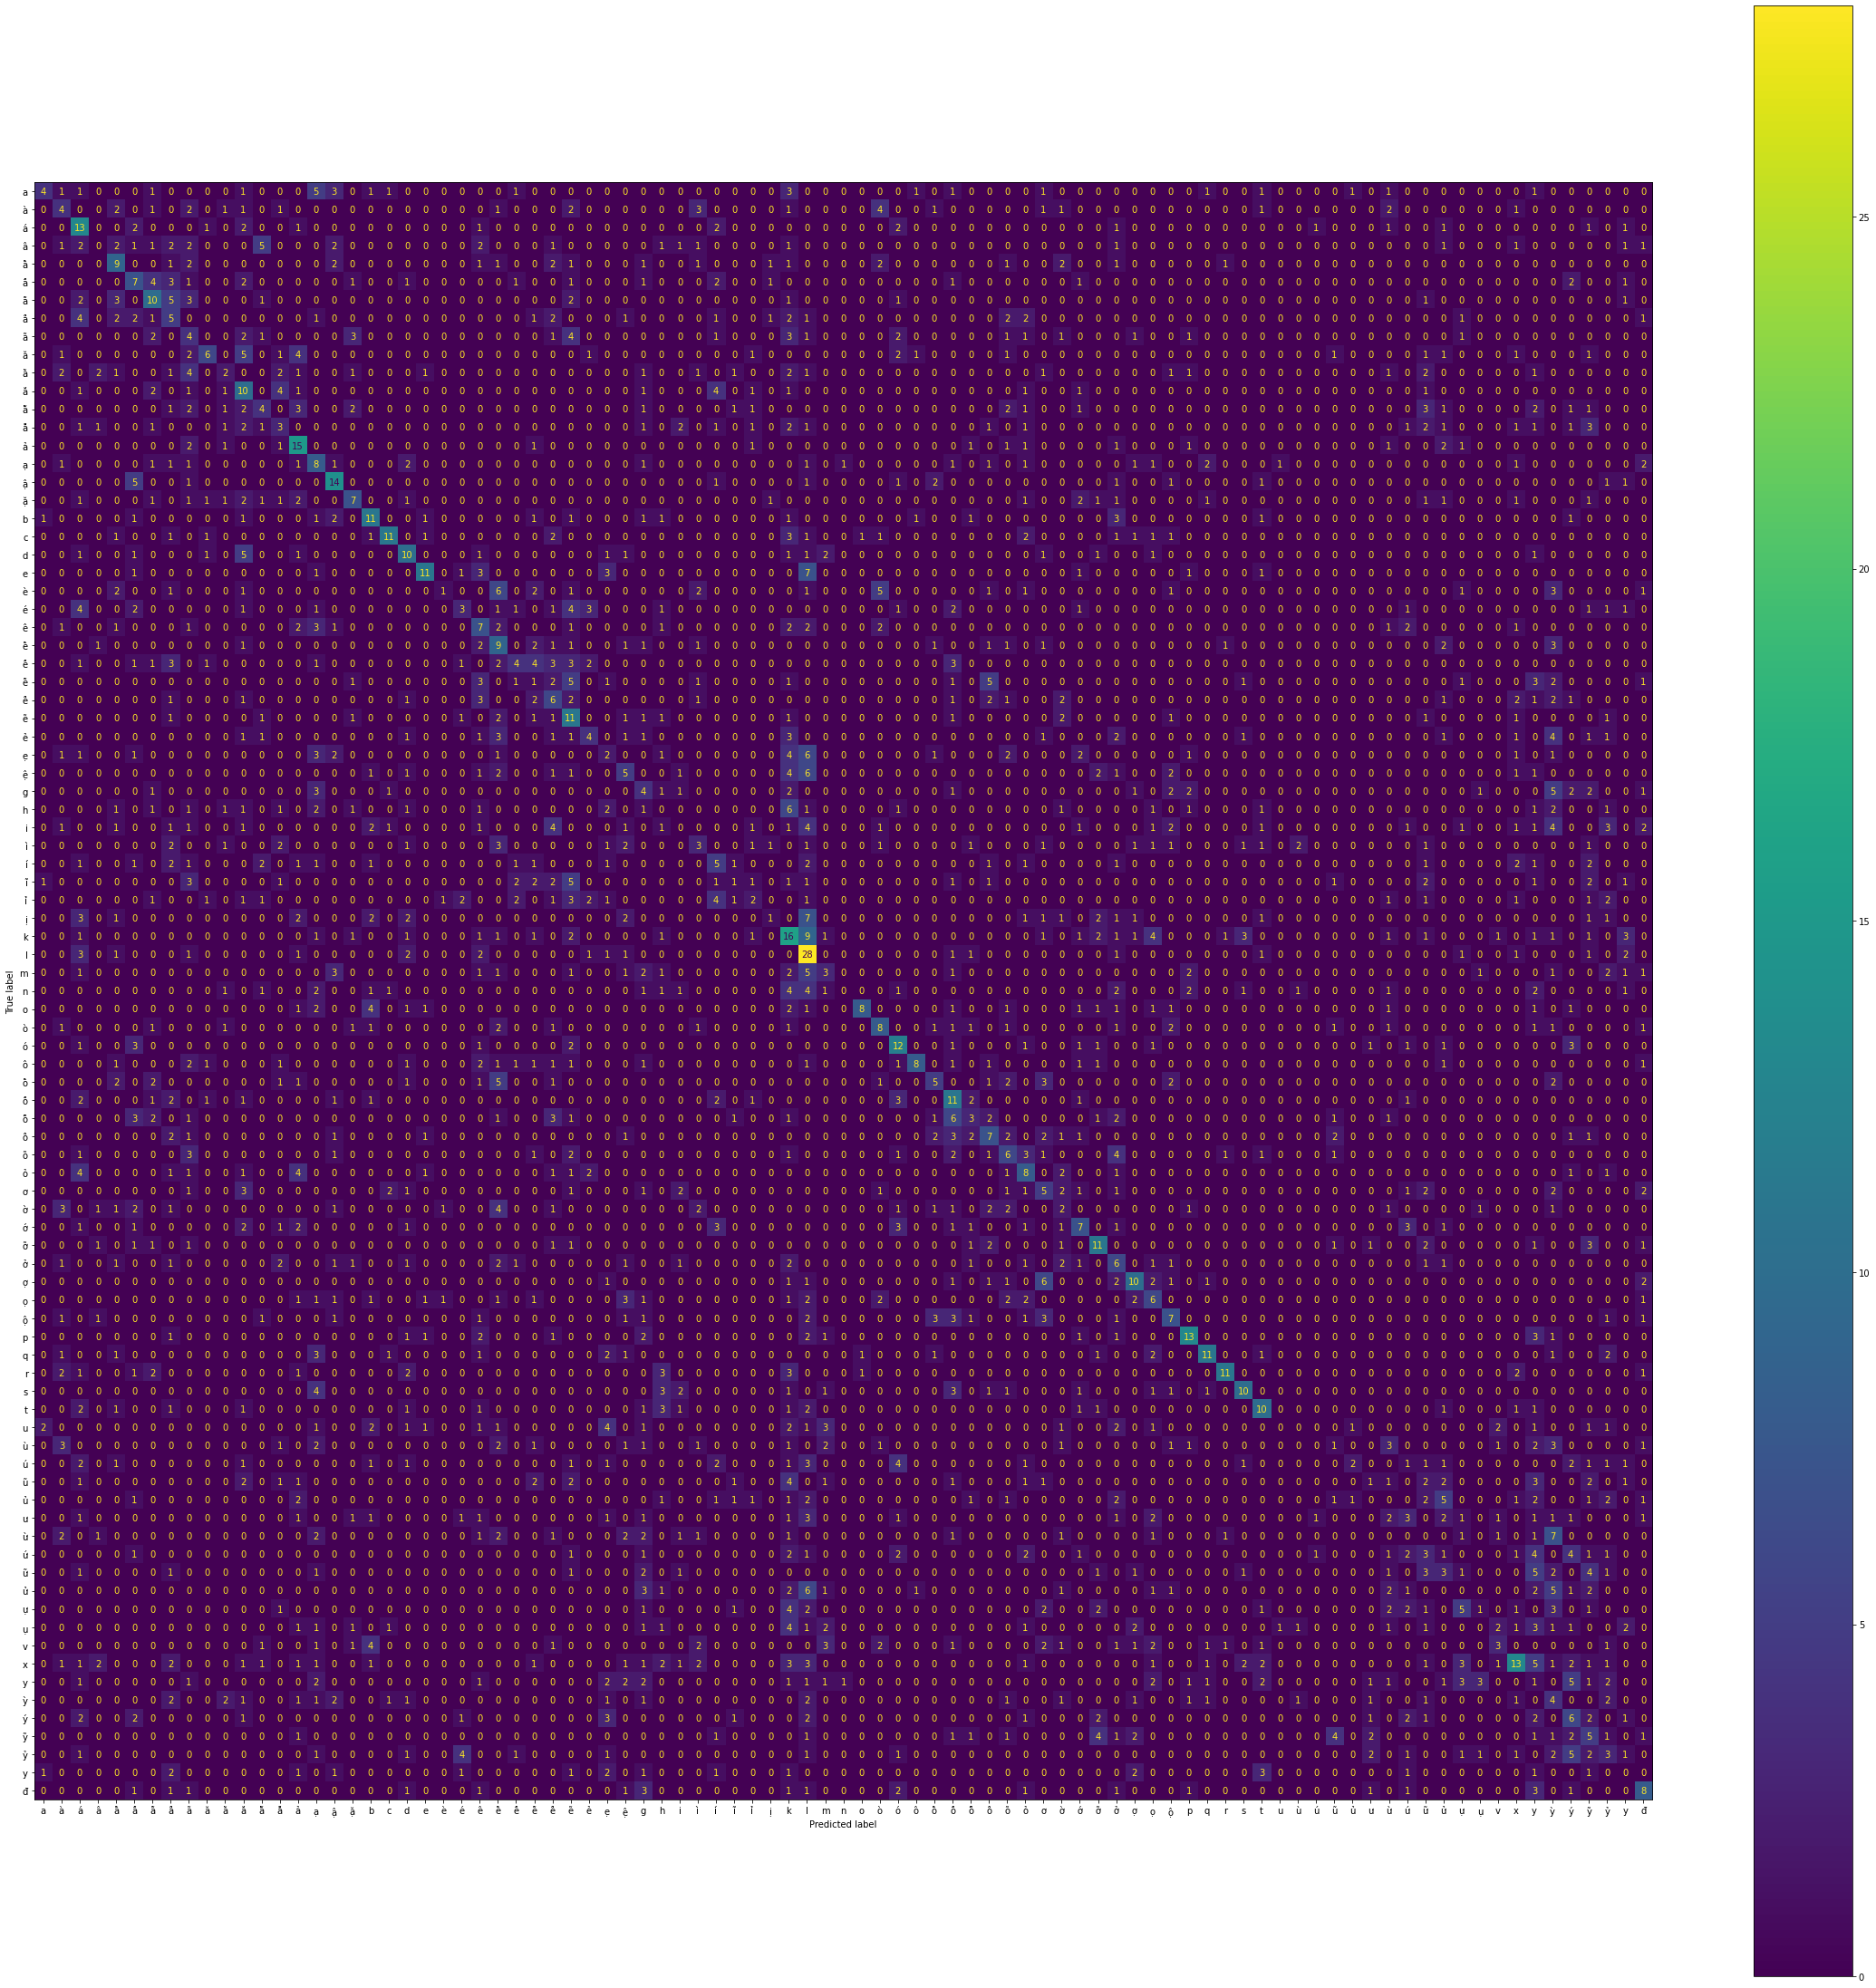

              precision    recall  f1-score   support

           a       0.44      0.13      0.21        30
          à       0.14      0.13      0.14        30
          á       0.21      0.43      0.28        30
          â       0.00      0.00      0.00        30
         ầ       0.26      0.30      0.28        30
         ấ       0.17      0.23      0.20        30
         ẫ       0.26      0.33      0.29        30
         ẩ       0.10      0.17      0.13        30
          ã       0.08      0.13      0.10        30
          ă       0.43      0.20      0.27        30
         ằ       0.14      0.07      0.09        30
         ắ       0.18      0.33      0.23        30
         ẵ       0.18      0.13      0.15        30
         ẳ       0.12      0.10      0.11        30
          ả       0.28      0.50      0.36        30
          ạ       0.14      0.27      0.19        30
         ậ       0.35      0.47      0.40        30
         ặ       0.30    

In [27]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

#Sử dụng model MLPClassifier 

In [6]:
from sklearn.neural_network import MLPClassifier

In [14]:
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
Y_vali = Y_vali.ravel()

In [15]:
MLP1_hog = MLPClassifier(hidden_layer_sizes=(1000), max_iter=500)
MLP1_hog.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1000, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
print(accuracy_score(Y_vali, MLP1_hog.predict(X_vali)))

0.42660857908847183


In [19]:
print(accuracy_score(Y_test, MLP1_hog.predict(X_test)))

0.19253081943437272


In [28]:
MLP2_hog = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000), max_iter=500)
MLP2_hog.fit(X_train, Y_train)
print(accuracy_score(Y_vali, MLP2_hog.predict(X_vali)))


0.4839142091152815


In [30]:
print(classification_report(Y_test, MLP2_hog.predict(X_test),target_names=labels))

              precision    recall  f1-score   support

           a       0.43      0.10      0.16        30
          à       0.28      0.30      0.29        30
          á       0.28      0.43      0.34        30
          â       0.12      0.03      0.05        30
         ầ       0.40      0.33      0.36        30
         ấ       0.27      0.27      0.27        30
         ẫ       0.43      0.43      0.43        30
         ẩ       0.36      0.40      0.38        30
          ã       0.13      0.13      0.13        30
          ă       0.53      0.27      0.36        30
         ằ       0.27      0.13      0.18        30
         ắ       0.19      0.33      0.24        30
         ẵ       0.32      0.27      0.29        30
         ẳ       0.24      0.27      0.25        30
          ả       0.48      0.53      0.51        30
          ạ       0.18      0.37      0.24        30
         ậ       0.43      0.43      0.43        30
         ặ       0.36    